### Unsupervised Analysis

In [ ]:
import os
import pandas as pd
import numpy as np
# Prompt the user for the flight condition
flight_condition = input("Please enter the flight condition (1-4): ")

# Validate the user input
while flight_condition not in ['1', '2', '3', '4']:
    print("Invalid input. Please try again.")
    flight_condition = input("Please enter the flight condition (1-4): ")

# Set the file names based on the flight condition
train_file = f'train_FD00{flight_condition}.txt'
test_file = f'test_FD00{flight_condition}.txt'
rul_file = f'RUL_FD00{flight_condition}.txt'

# Load the train dataset as a dataframe
train_dataset_path = os.path.join('/content/dataset/CMaps', train_file)
train_data = pd.read_csv(train_dataset_path, delimiter='\s+', header=None)

# Load the test dataset as a dataframe
test_dataset_path = os.path.join('/content/dataset/CMaps', test_file)
test_data = pd.read_csv(test_dataset_path, delimiter='\s+', header=None)

# Load the RUL dataset as a dataframe
rul_dataset_path = os.path.join('/content/dataset/CMaps', rul_file)
rul_data = pd.read_csv(rul_dataset_path, delimiter='\s+', header=None)



columns_train = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
train_data.columns = columns_train
train_data.describe()



columns_test = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
test_data.columns = columns_train
test_data.describe()

Please enter the flight condition (1-4): 2


,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,...,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000
mean,127.528346,81.223647,23.975176,0.571154,94.066665,472.930049,579.591704,1418.562090,1203.086538,8.039014,...,266.499351,2334.696674,8063.638811,9.315214,0.023141,347.938807,2229.025301,97.764616,20.839067,12.503918
std,74.144727,58.892845,14.778958,0.310998,14.217415,26.454686,37.338929,105.979169,119.039415,3.623831,...,138.104790,127.888432,83.829038,0.747609,0.004642,27.759465,145.235683,5.356411,9.908785,5.944582
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.410000,1245.160000,1030.090000,3.910000,...,129.310000,2027.790000,7851.310000,8.330200,0.020000,303.000000,1915.000000,84.930000,10.180000,6.123100
25%,65.000000,34.000000,10.004600,0.250600,100.000000,449.440000,549.480000,1351.640000,1122.520000,5.480000,...,163.775000,2387.890000,8061.375000,8.663500,0.020000,330.000000,2212.000000,100.000000,13.990000,8.407150
50%,128.000000,70.000000,25.001300,0.700000,100.000000,462.540000,555.830000,1367.370000,1134.160000,7.050000,...,183.260000,2388.060000,8080.280000,9.303500,0.020000,334.000000,2223.000000,100.000000,14.900000,8.938800
75%,189.000000,119.000000,35.008000,0.840000,100.000000,491.190000,607.260000,1498.300000,1305.455000,10.520000,...,371.450000,2388.130000,8125.840000,9.374500,0.030000,369.000000,2324.000000,100.000000,28.520000,17.111200
max,259.000000,367.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,...,523.220000,2389.960000,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.320000,23.614100


In [ ]:
def calculate_rul(train_data, test_data, rul_data):
    # Define a function to calculate the remaining useful life (RUL)
    def add_rul(g):
        # Calculate the RUL as the difference between the maximum cycle value and the cycle value for each row
        max_cycle = g['cycles'].max()
        g['RUL'] = max_cycle - g['cycles']
        return g

    # Apply the add_rul function to the training data grouped by the unit ID
    train_data = train_data.groupby('unit_ID').apply(add_rul)

    # Calculate RUL for the test data
    count = test_data["unit_ID"].unique()
    rul_list = []

    for n in count:
        time_list = np.array(test_data[test_data['unit_ID'] == n]['cycles'])
        length = len(time_list)
        rul_val = rul_data.iloc[n-1].item()
        rul = list(length - time_list + rul_val)
        rul_list += rul

    test_data['RUL'] = rul_list

    return train_data, test_data



train_data, test_data=calculate_rul(train_data, test_data, rul_data)

<ipython-input-11-78f6426d67b3>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_data = train_data.groupby('unit_ID').apply(add_rul)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples

def perform_silhouette_analysis(data, min_samples_range, eps_range):
    """
    Perform silhouette analysis for a range of min_samples and eps values in DBSCAN.

    Args:
        data (numpy.ndarray or pandas.DataFrame): Input data for clustering.
        min_samples_range (list): Range of min_samples values to evaluate.
        eps_range (list): Range of eps values to evaluate.

    Returns:
        dict: Average silhouette scores for each combination of min_samples and eps.
    """

    # Convert input data to numpy array
    if isinstance(data, pd.DataFrame):
        data = data.values

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Create subplots
    fig, axes = plt.subplots(len(min_samples_range), len(eps_range), figsize=(20, 15))

    # Dictionary to store the average silhouette scores
    silhouette_avg_scores = {}

    for i, min_samples in enumerate(min_samples_range):
        for j, eps in enumerate(eps_range):

            # Select current axis
            ax = axes[i, j]

            # Create the DBSCAN model
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # Fit the model and obtain cluster labels
            labels = dbscan.fit_predict(data_scaled)

            # Calculate silhouette scores for each sample
            sample_silhouette_values = silhouette_samples(data_scaled, labels)
            silhouette_avg_scores[(min_samples, eps)] = np.mean(sample_silhouette_values)

            y_lower = 10
            for k in np.unique(labels):
                # Aggregate the silhouette scores for samples belonging to cluster k, and sort them
                ith_cluster_silhouette_values = sample_silhouette_values[labels == k]
                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = plt.cm.nipy_spectral(float(k) / len(np.unique(labels)))
                ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                                 facecolor=color, edgecolor=color, alpha=0.7)

                # Label the silhouette plots with their cluster numbers at the middle
                ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(k))

                # Compute the new y_lower for next plot
                y_lower = y_upper + 10

            ax.set_title(f"eps={eps}, min_samples={min_samples}")
            ax.set_xlabel("Silhouette coefficient values")
            ax.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            ax.axvline(x=np.mean(sample_silhouette_values), color="red", linestyle="--")

            ax.set_yticks([])  # Clear the y-axis labels
            ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Show plot
    plt.show()

    # Return the average silhouette scores
    return silhouette_avg_scores


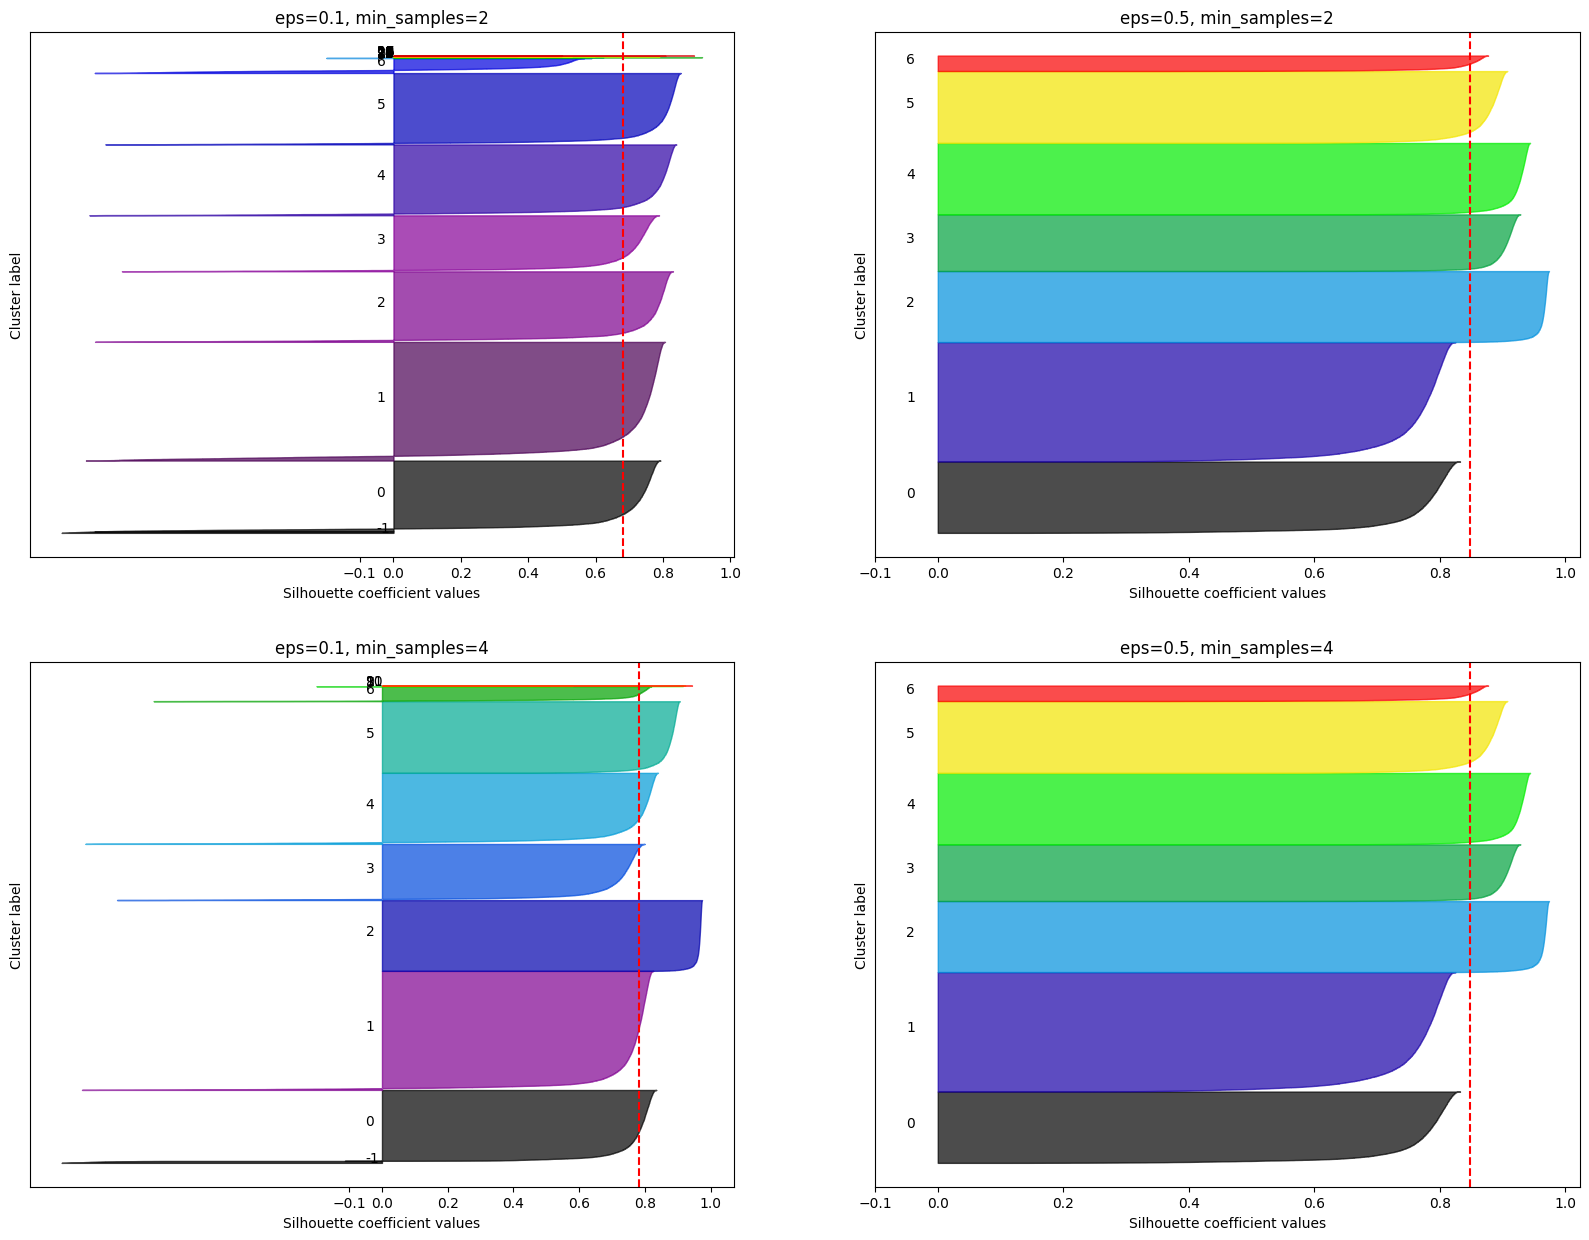

min_samples=2, eps=0.1: Silhouette Score = 0.6827388553928608
min_samples=2, eps=0.5: Silhouette Score = 0.8481116471397333
min_samples=4, eps=0.1: Silhouette Score = 0.7818492745963975
min_samples=4, eps=0.5: Silhouette Score = 0.8481116471397333


In [ ]:
data = train_data[sensors]

# Define the range of min_samples and eps values to evaluate
min_samples_range = [2,4]
eps_range = [0.1, 0.5]

silhouette_scores = perform_silhouette_analysis(data, min_samples_range, eps_range)

# Print the silhouette scores for each combination of min_samples and eps
for params, score in silhouette_scores.items():
    print(f"min_samples={params[0]}, eps={params[1]}: Silhouette Score = {score}")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

def plot_tsne(data, eps, min_samples):
    """
    Perform DBSCAN on data with provided eps and min_samples, and then plot a t-SNE visualization of the clusters.

    Args:
        data (numpy.ndarray or pandas.DataFrame): Input data for clustering.
        eps (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
        None
    """

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Run DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_scaled)

    # Run t-SNE
    tsne = TSNE(n_components=2)
    data_tsne = tsne.fit_transform(data_scaled)

    # Plot t-SNE
    unique_labels = np.unique(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    fig, ax = plt.subplots(figsize=(12, 12))

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data_tsne[class_member_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

        # Annotate cluster labels on the plot
        centroid = np.mean(xy, axis=0)
        ax.annotate(f"Cluster {k}", xy=centroid, xytext=(0, 10), textcoords="offset points",
                    ha="center", va="center",
                    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black"))

    ax.set_title('t-SNE visualization of clustered data')
    ax.set_xlabel('t-SNE feature 1')
    ax.set_ylabel('t-SNE feature 2')
    plt.show()


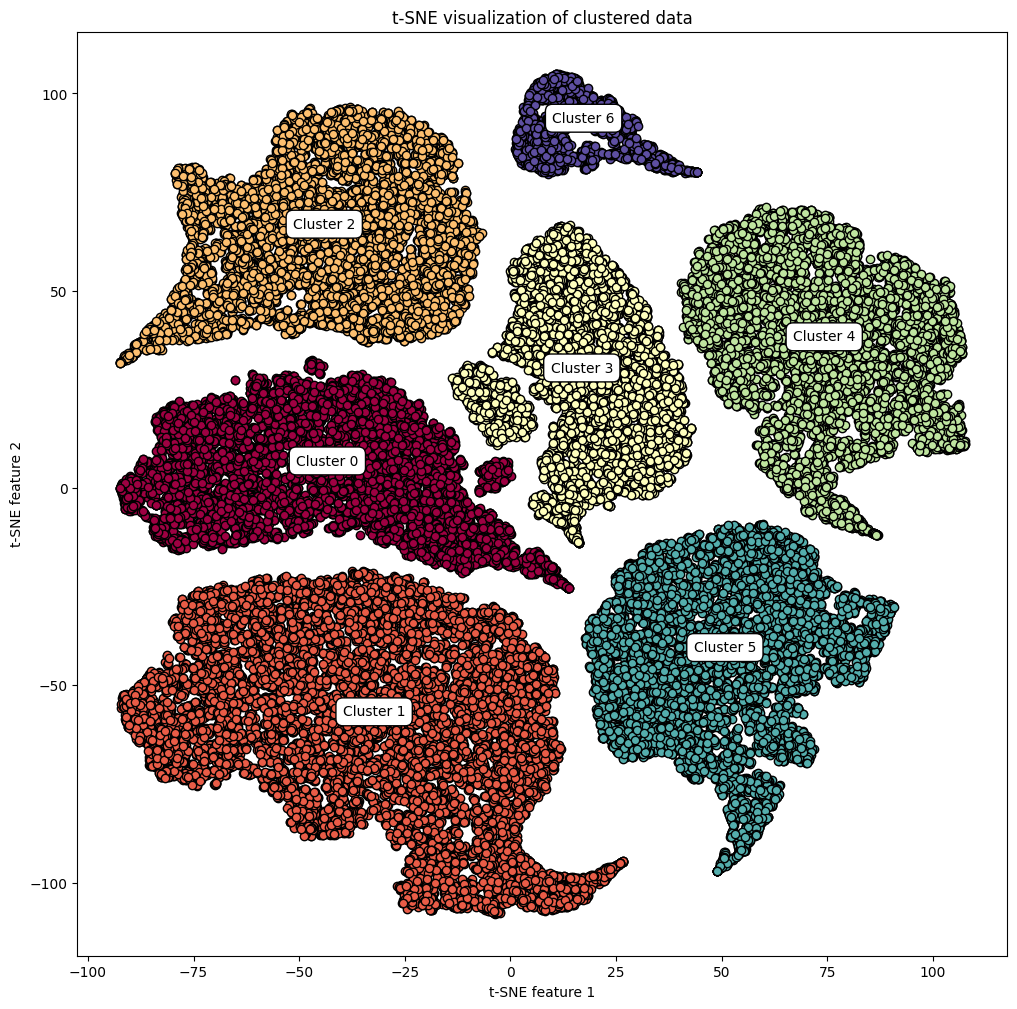

In [ ]:
plot_tsne(data, eps=0.5, min_samples=4)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import pairwise_distances

def associate_outliers_to_nearest_cluster(train_data, min_samples=6, eps=0.5):
    """
    Associates outliers with the nearest cluster using DBSCAN.

    Args:
        train_data (numpy.ndarray or pandas.DataFrame): Input data for clustering.
        min_samples (int): Minimum number of samples in a neighborhood for a point to be considered a core point. Default is 6.
        eps (float): The maximum distance between two samples for them to be considered as in the same neighborhood. Default is 0.5.

    Returns:
        pandas.DataFrame: Data points with cluster labels assigned by DBSCAN, including outliers associated with the nearest cluster.
    """
    # Convert input data to pandas DataFrame
    if isinstance(train_data, np.ndarray):
        train_data = pd.DataFrame(train_data)

    # Get the column names excluding 'unit_ID'
    columns_to_scale = [col for col in train_data.columns if col != 'unit_ID']

    # Initialize the RobustScaler
    scaler = RobustScaler()

    # Fit the scaler to the training data and transform the data
    train_data_scaled = scaler.fit_transform(train_data[columns_to_scale])

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model and obtain cluster labels
    labels = dbscan.fit_predict(train_data_scaled)

    # Identify core samples
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True

    # Associate outliers with the nearest cluster
    for i, label in enumerate(labels):
        if label == -1:  # Check if it's an outlier
            distances = pairwise_distances(train_data_scaled[i].reshape(1, -1), train_data_scaled[core_samples_mask])
            nearest_core_sample_idx = np.argmin(distances)
            labels[i] = labels[dbscan.core_sample_indices_][nearest_core_sample_idx]

    # Add cluster labels to the data
    labeled_data = train_data.copy()
    labeled_data['cluster_label'] = labels

    return labeled_data




In [ ]:
# Call the function with your train_data and parameters
filtered_data = associate_outliers_to_nearest_cluster(train_data, min_samples=4, eps=0.5)

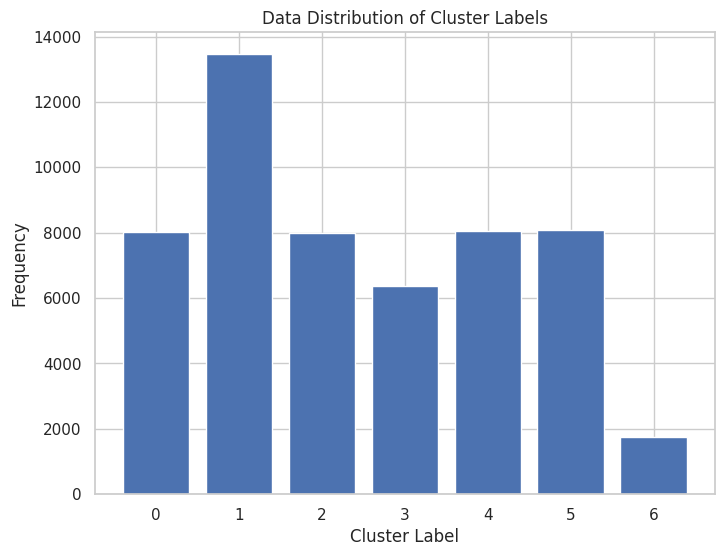

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'
cluster_label_counts = Counter(filtered_data['cluster_label'])

# Extracting the labels and counts
labels = list(cluster_label_counts.keys())
counts = list(cluster_label_counts.values())

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Data Distribution of Cluster Labels')
plt.show()


In [ ]:
path = 'clustered_1.csv'
filtered_data.to_csv(path, index=False)

# Degradation Modelling

In [ ]:
pip  install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=822e2493f37f01a2f79e1d44ca28bae8ac2853950b084537a148fd9010f9ae7e
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import mean_squared_error, r2_score
from lifelines import KaplanMeierFitter, CoxTimeVaryingFitter

In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Setting seed for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Cmaps.zip' -d /content/dataset


Archive:  /content/drive/MyDrive/Cmaps.zip
  inflating: /content/dataset/CMaps/Damage Propagation Modeling.pdf  
  inflating: /content/dataset/CMaps/RUL_FD001.txt  
  inflating: /content/dataset/CMaps/RUL_FD002.txt  
  inflating: /content/dataset/CMaps/RUL_FD003.txt  
  inflating: /content/dataset/CMaps/RUL_FD004.txt  
  inflating: /content/dataset/CMaps/readme.txt  
  inflating: /content/dataset/CMaps/test_FD001.txt  
  inflating: /content/dataset/CMaps/test_FD002.txt  
  inflating: /content/dataset/CMaps/test_FD003.txt  
  inflating: /content/dataset/CMaps/test_FD004.txt  
  inflating: /content/dataset/CMaps/train_FD001.txt  
  inflating: /content/dataset/CMaps/train_FD002.txt  
  inflating: /content/dataset/CMaps/train_FD003.txt  
  inflating: /content/dataset/CMaps/train_FD004.txt  
  inflating: /content/dataset/CMaps/x.txt  


In [ ]:
import pandas as pd
import os

# Define filepaths to read data
dir_path = '/content/dataset/CMaps/'
train_file = 'train_FD002.txt'
test_file = 'test_FD002.txt'
rul_file = 'RUL_FD002.txt'

# Verify the existence of files
print("Files in directory:", os.listdir(dir_path))

# Check if the files exist at the specified path
assert os.path.exists(dir_path + train_file), "Train file not found!"
assert os.path.exists(dir_path + test_file), "Test file not found!"
assert os.path.exists(dir_path + rul_file), "RUL file not found!"

# Define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi',
                'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']
col_names = index_names + setting_names + sensor_names

# Read data
try:
    train = pd.read_csv(dir_path + train_file, sep='\s+', header=None, names=col_names)
    print("Train data loaded successfully")
except Exception as e:
    print("Error loading train data:", e)

try:
    X_test = pd.read_csv(dir_path + test_file, sep='\s+', header=None, names=col_names)
    print("Test data loaded successfully")
except Exception as e:
    print("Error loading test data:", e)

try:
    y_test = pd.read_csv(dir_path + rul_file, sep='\s+', header=None, names=['RemainingUsefulLife'])
    print("RUL data loaded successfully")
except Exception as e:
    print("Error loading RUL data:", e)

# Display data shapes and types to verify
print("\nTrain Data Shape:", train.shape)
print("Train Data Types:\n", train.dtypes)

print("\nTest Data Shape:", X_test.shape)
print("Test Data Types:\n", X_test.dtypes)

print("\nRUL Data Shape:", y_test.shape)
print("RUL Data Types:\n", y_test.dtypes)

# Display first few rows of each DataFrame
print("\nTrain Data Head:\n", train.head())
print("\nTest Data Head:\n", X_test.head())
print("\nRUL Data Head:\n", y_test.head())




Files in directory: ['test_FD002.txt', 'RUL_FD001.txt', 'Damage Propagation Modeling.pdf', 'train_FD002.txt', 'x.txt', 'train_FD003.txt', 'test_FD003.txt', 'test_FD001.txt', 'RUL_FD004.txt', 'train_FD004.txt', 'readme.txt', 'train_FD001.txt', 'RUL_FD003.txt', 'RUL_FD002.txt', 'test_FD004.txt']
Train data loaded successfully
Test data loaded successfully
RUL data loaded successfully

Train Data Shape: (53759, 26)
Train Data Types:
 unit_nr          int64
time_cycles      int64
setting_1      float64
setting_2      float64
setting_3      float64
T2             float64
T24            float64
T30            float64
T50            float64
P2             float64
P15            float64
P30            float64
Nf             float64
Nc             float64
epr            float64
Ps30           float64
phi            float64
NRf            float64
NRc            float64
BPR            float64
farB           float64
htBleed          int64
Nf_dmd           int64
PCNfR_dmd      float64
W31          

In [ ]:
# Linear RUL modelling

def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed

    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)  # add computed RUL for later use
display(train[index_names+['RUL']].head())

,unit_nr,time_cycles,RUL
0,1,1,148
1,1,2,147
2,1,3,146
3,1,4,145
4,1,5,144


In [ ]:
train= train.copy()
clipped_rul = train.loc[train['unit_nr']==20].copy()
clipped_rul['RUL'].clip(upper=125, inplace=True)

<ipython-input-8-e59bb5929723>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clipped_rul['RUL'].clip(upper=125, inplace=True)


In [ ]:
train['RUL'].clip(upper=125, inplace=True)  # clip RUL as discussed in SVR and problem framing analysis

drop_sensors = ['T2','P2' , 'P15','epr','farB','Nf_dmd','PCNfR_dmd']  # non-informative features, derived from EDA
drop_labels = setting_names + drop_sensors
train.drop(labels=drop_labels, axis=1, inplace=True)

<ipython-input-9-ec032fec3c65>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['RUL'].clip(upper=125, inplace=True)  # clip RUL as discussed in SVR and problem framing analysis


In [ ]:
train['breakdown'] = 0
idx_last_record = train.reset_index().groupby(by='unit_nr')['index'].last()  # engines breakdown at the last cycle
train.loc[idx_last_record, 'breakdown'] = 1

In [ ]:
train['start'] = train['time_cycles'] - 1
train.tail() # check results

,unit_nr,time_cycles,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL,breakdown,start
53754,260,312,608.79,1495.60,1269.51,334.00,2324.92,8852.27,44.72,314.05,2389.02,8169.64,9.3035,369,24.36,14.5189,4,0,311
53755,260,313,605.81,1514.32,1324.12,392.46,2319.17,8915.86,46.08,371.22,2388.42,8245.36,8.7586,374,28.10,16.9454,3,0,312
53756,260,314,537.48,1276.24,1057.92,175.11,1917.37,8114.33,37.14,163.74,2030.33,7971.25,11.0657,310,14.19,8.5503,2,0,313
53757,260,315,537.84,1272.95,1066.30,174.81,1917.36,8112.63,37.32,164.37,2030.35,7972.47,11.0537,311,14.05,8.3729,1,0,314
53758,260,316,556.64,1374.61,1145.52,194.33,2225.12,8478.44,42.50,183.09,2390.38,8185.35,9.3998,338,14.75,8.8446,0,1,315


In [ ]:
cut_off = 350

train_censored = train[train['time_cycles'] <= cut_off].copy()

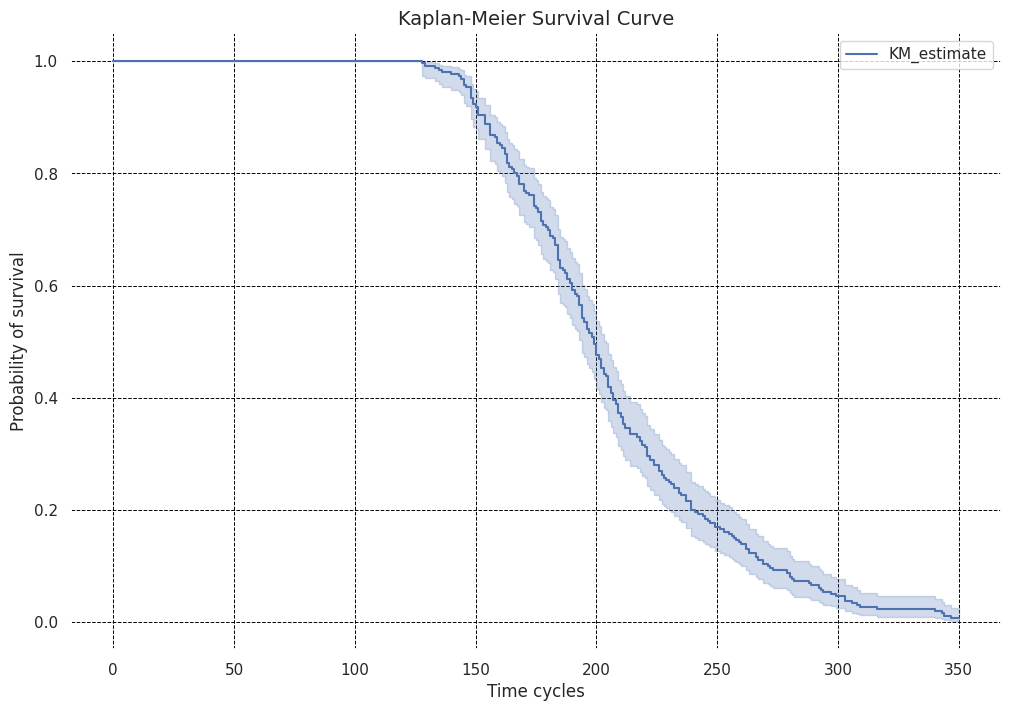

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming `data` contains the required columns: 'time_cycles' and 'breakdown'
data = train_censored[index_names + ['breakdown']].groupby('unit_nr').last()

# Configure the plot style
plt.figure(figsize=(12, 8))
plt.rcParams['axes.facecolor'] = 'white'  # Set the plot background to white
plt.rcParams['grid.color'] = 'black'     # Set the grid lines to black
plt.rcParams['grid.linestyle'] = '-'    # Optional: dashed grid lines

# Create Kaplan-Meier curve
survival = KaplanMeierFitter()
survival.fit(data['time_cycles'], data['breakdown'])
survival.plot()

# Customize labels and grid
plt.ylabel("Probability of survival", fontsize=12)
plt.xlabel("Time cycles", fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.7)  # Ensure grid is visible
plt.title("Kaplan-Meier Survival Curve", fontsize=14)
plt.show()
plt.close()


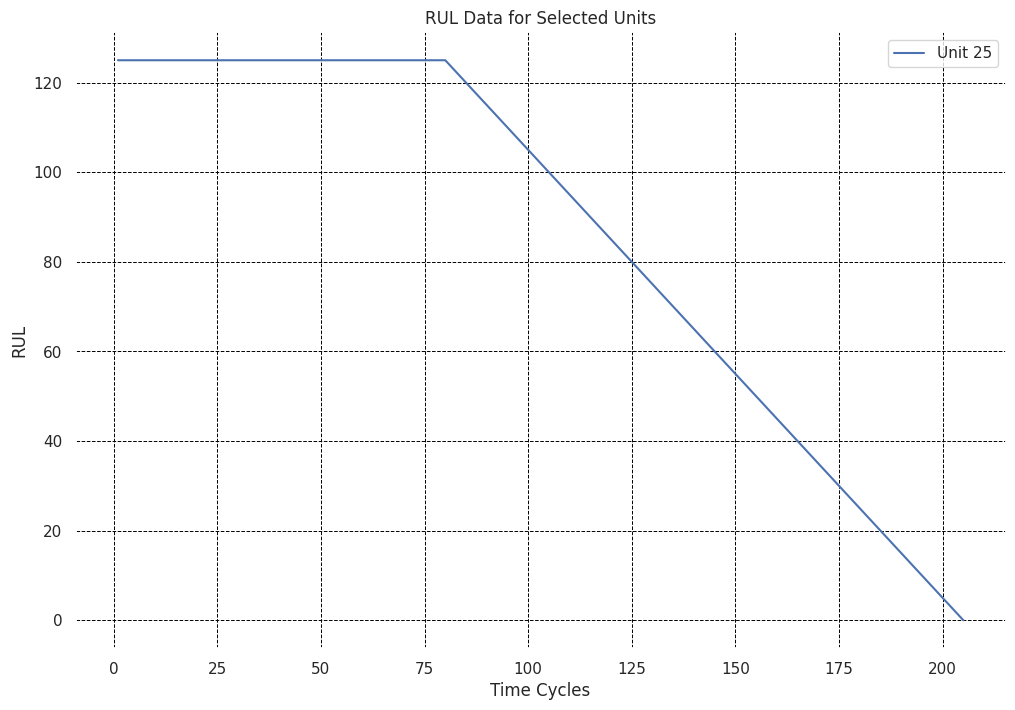

In [ ]:
# Select a subset of unit numbers to plot
subset_units = [25] # Selecting the first 5 units for clarity

# Initialize plot
plt.figure(figsize=(12, 8))

# Plot RUL data for each unit in the subset
for unit in subset_units:
    unit_data = train[train['unit_nr'] == unit]
    plt.plot(unit_data['time_cycles'], unit_data['RUL'], label=f'Unit {unit}')

plt.xlabel('Time Cycles')
plt.ylabel('RUL')
plt.title('RUL Data for Selected Units')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.7)  # Ensure grid is visible
plt.show()

## Static Degradation Modelling

In [ ]:
label =  pd.read_csv('/content/drive/MyDrive/FD002_labeled.csv')

In [ ]:
train["cluster_label"]=label["cluster_label"]

In [ ]:
train

,unit_nr,time_cycles,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL,breakdown,start,cluster_label
0,1,1,555.32,1358.61,1137.23,194.64,2222.65,8341.91,42.02,183.06,2387.72,8048.56,9.3461,334,14.73,8.8071,125,0,0,0
1,1,2,549.90,1353.22,1125.78,138.51,2211.57,8303.96,42.20,130.42,2387.66,8072.30,9.3774,330,10.41,6.2665,125,0,1,1
2,1,3,537.31,1256.76,1047.45,175.71,1915.11,8001.42,36.69,164.22,2028.03,7864.87,10.8941,309,14.08,8.6723,125,0,2,2
3,1,4,549.51,1354.03,1126.38,138.46,2211.58,8303.96,41.96,130.72,2387.61,8068.66,9.3528,329,10.59,6.4701,125,0,3,1
4,1,5,537.07,1257.71,1047.93,175.05,1915.10,7993.23,36.89,164.31,2028.00,7861.23,10.8963,309,14.13,8.5286,125,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,608.79,1495.60,1269.51,334.00,2324.92,8852.27,44.72,314.05,2389.02,8169.64,9.3035,369,24.36,14.5189,4,0,311,6
53755,260,313,605.81,1514.32,1324.12,392.46,2319.17,8915.86,46.08,371.22,2388.42,8245.36,8.7586,374,28.10,16.9454,3,0,312,5
53756,260,314,537.48,1276.24,1057.92,175.11,1917.37,8114.33,37.14,163.74,2030.33,7971.25,11.0657,310,14.19,8.5503,2,0,313,2
53757,260,315,537.84,1272.95,1066.30,174.81,1917.36,8112.63,37.32,164.37,2030.35,7972.47,11.0537,311,14.05,8.3729,1,0,314,2


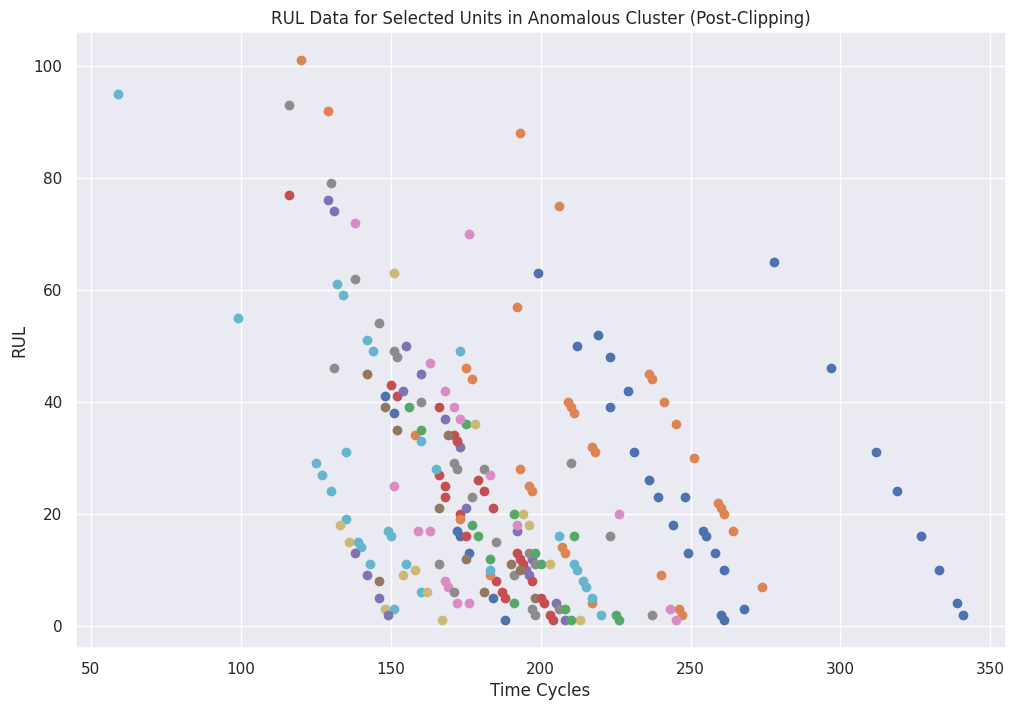

In [ ]:
# Filter the data where cluster == 6 (anomalous cluster)
anomalous_data = train[(train['cluster_label'] == 6) & (train['RUL'] < 125)]

# Plot RUL data for selected units where cluster == 6 and RUL < 125
subset_units = anomalous_data['unit_nr'].unique()[10:50]  # Selecting the first 5 units for clarity
plt.figure(figsize=(12, 8))

for unit in subset_units:
    unit_data = anomalous_data[anomalous_data['unit_nr'] == unit]
    plt.scatter(unit_data['time_cycles'], unit_data['RUL'], label=f'Unit {unit}')

plt.xlabel('Time Cycles')
plt.ylabel('RUL')
plt.title('RUL Data for Selected Units in Anomalous Cluster (Post-Clipping)')
plt.grid(True)
plt.show()


In [ ]:
train.columns

Index(['unit_nr', 'time_cycles', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc',
       'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL',
       'breakdown', 'start', 'cluster_label'],
      dtype='object')

In [ ]:
def adjust_rul_for_anomalies(df, cluster_label=6, non_linear_factor=10):
    """
    Adjusts the RUL calculation to apply non-linear degradation after anomalies occur.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        cluster_label (int): The cluster label indicating anomalies.
        non_linear_factor (int): Factor by which the degradation rate increases after an anomaly.

    Returns:
        pd.DataFrame: The dataframe with adjusted RUL.
    """
    adjusted_rul = df.copy()
    units = adjusted_rul['unit_nr'].unique()

    for unit in units:
        unit_data = adjusted_rul[adjusted_rul['unit_nr'] == unit]
        anomalies = unit_data[unit_data['cluster_label'] == cluster_label]

        if not anomalies.empty:
            for anomaly_index in anomalies.index:
                time_of_anomaly = anomalies.loc[anomaly_index, 'time_cycles']
                for idx, row in unit_data.loc[anomaly_index:].iterrows():
                    adjusted_rul.loc[idx, 'RUL'] *= (1 - non_linear_factor * (row['time_cycles'] - time_of_anomaly) / 1000)

    # Ensure RUL does not increase and remains smooth
    adjusted_rul['RUL_clipped'] = adjusted_rul['RUL'].clip(lower=0)

    return adjusted_rul

<ipython-input-19-3d4f6adfbfec>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.26' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adjusted_rul.loc[idx, 'RUL'] *= (1 - non_linear_factor * (row['time_cycles'] - time_of_anomaly) / 1000)


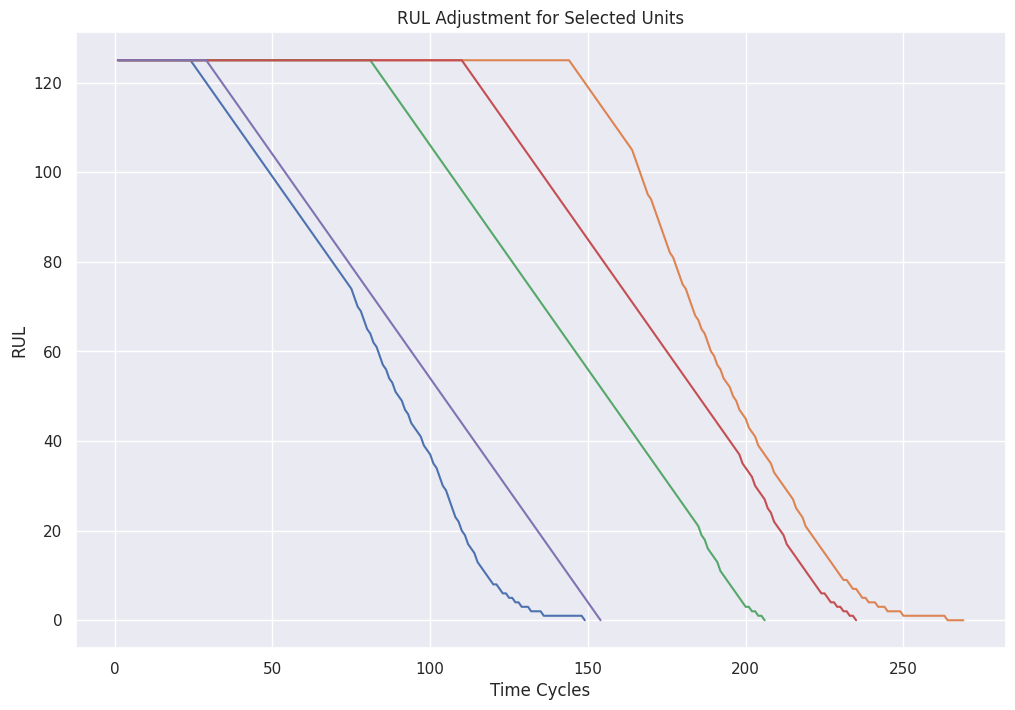

In [ ]:
adjusted_anomalous_data = adjust_rul_for_anomalies(train)
df = adjusted_anomalous_data.copy()
# Assuming 'df' is your DataFrame already loaded with necessary columns
df['RUL_clipped'] = np.ceil(df['RUL_clipped'])
# Plotting
plt.figure(figsize=(12, 8))
subset_units = adjusted_anomalous_data['unit_nr'].unique()[:5]  # For broader visibility

for unit in subset_units:
    unit_data = df[df['unit_nr'] == unit]
    plt.plot(unit_data['time_cycles'], unit_data['RUL_clipped'], label=f'Unit {unit}')

plt.xlabel('Time Cycles')
plt.ylabel('RUL')
plt.title('RUL Adjustment for Selected Units')
plt.grid(True)
plt.show()

## Dynamic Degradation Modelling

Computing TSNE:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Computing TSNE: 100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


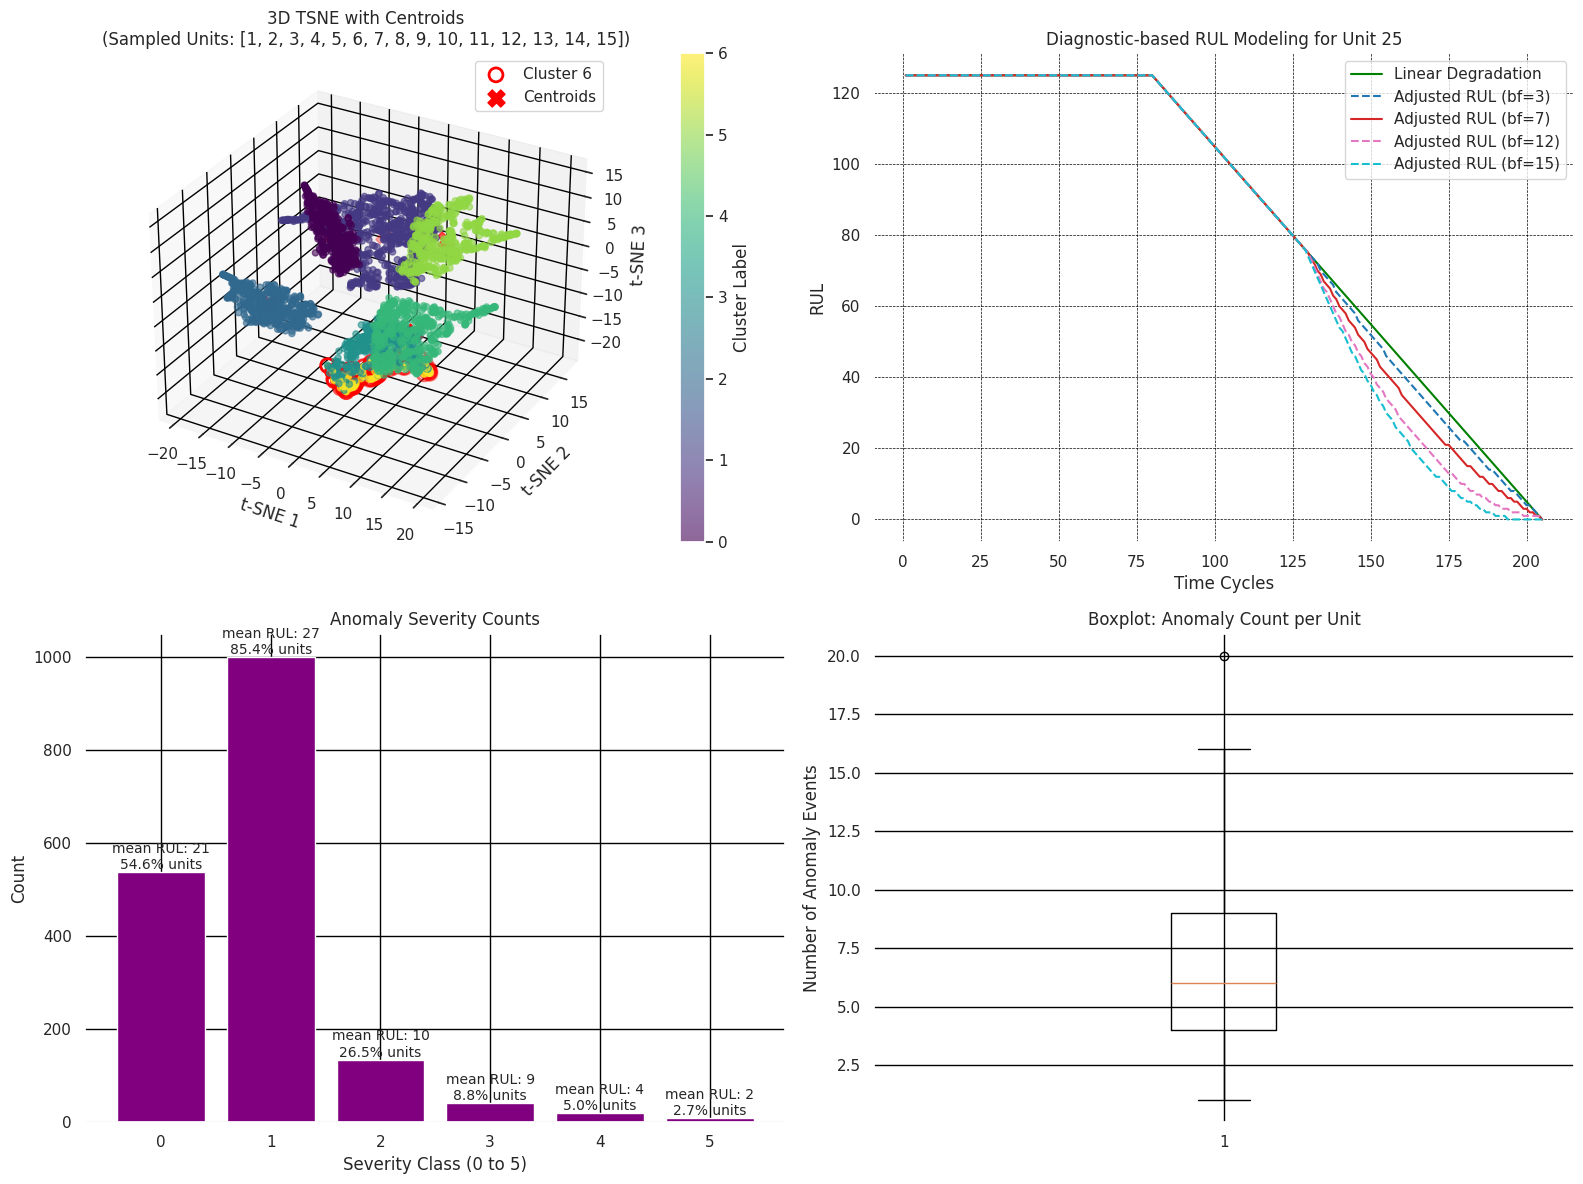

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from tqdm import tqdm  # For the progress bar
import matplotlib.gridspec as gridspec

def process_cmaps_data(
    df,
    cluster_features=['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc',
                      'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32'],
    anomaly_cluster=6,
    base_factors=[2,5,10,15],
    official_base_factor=5,
    sample_units=4,     # Number of units to sample for TSNE/centroid plotting (top-left plot)
    tsne_units=None,    # List/array of unit IDs for TSNE; if None, use first sample_units
    unit_id=None,       # Unit id for the time series plot; if None, use the first available unit
    tsne_kwargs_3d=None
):
    """
    Processes the CMAPSS dataset by computing adjusted RUL values for each base factor,
    and then produces a 2x2 grid plot containing:

      - Top Left: A 3D t-SNE plot of the sensor data (after scaling) computed using a subset of units
                  (specified via tsne_units or the first sample_units) with cluster centroids overlaid
                  and the anomaly cluster (cluster 6) highlighted.
      - Top Right: A time series plot for a selected unit (specified by unit_id) showing the original RUL and
                   the adjusted RUL curves for each base factor. The official base factor (default 5) is drawn
                   as a solid line and others as dashed lines, with colors assigned from a palette.
      - Bottom Left: A bar chart of anomaly severity classes (0 to 5) (based on the official base factor run)
                     with each bar annotated with the mean adjusted RUL for anomaly events in that severity class
                     and the percentage of units affected.
      - Bottom Right: A boxplot showing the distribution of the number of anomaly events per unit.

    The adjusted RUL is computed per unit as:

         new_RUL = Original RUL * (1 - dynamic_factor * (time_cycles - t0)/1000)

    where for an anomaly event at time t0, the dynamic_factor is computed as:

         dynamic_factor = base_factor * (d / ref_distance)

    with d being the Euclidean distance (in scaled sensor space) between that anomaly event and the anomaly cluster centroid,
    and ref_distance being the mean distance for all anomaly events.

    The new RUL is updated multiplicatively (taking the minimum across events so that it never increases) and finally
    rounded upward (ceiling) to an integer.

    For the official run (base_factor = official_base_factor), the computed dynamic factors are normalized (to [0,1]) and
    used to assign a severity class (0 to 5) which is stored in column 'severity'.

    Parameters:
        df (pd.DataFrame): DataFrame containing your data. Must include:
                           - 'unit_nr'
                           - 'time_cycles'
                           - 'RUL'
                           - 'cluster_label' (with exactly 7 clusters, labeled 0 to 6)
                           - The sensor features as specified in cluster_features.
        cluster_features (list): List of sensor feature column names.
        anomaly_cluster (int): Cluster label representing anomalies (default is 6).
        base_factors (list): List of base_factor values to test (default is [2,5,10,15]).
        official_base_factor (int or float): The base_factor whose results (adjusted_RUL, dynamic_factor, severity)
                                             will be used for the returned dataset and severity calculations (default is 5).
        sample_units (int): Number of unique unit time series to sample for TSNE plotting (top-left plot).
        tsne_units: List/array of unit IDs to use for TSNE and centroid plotting; if None, the first sample_units are used.
        unit_id: The unit id to use for the time series plot (top-right); if None, the first available unit is used.
        tsne_kwargs_3d (dict): Additional keyword arguments for 3D TSNE.
                               Defaults to {"n_components": 3, "random_state":42, "perplexity":30, "n_iter":1000}.

    Returns:
        pd.DataFrame: A copy of df with the following new columns (from the official_base_factor run):
                      - 'adjusted_RUL' (as an integer, computed with official_base_factor)
                      - 'dynamic_factor' (for anomaly events, from official_base_factor run)
                      - 'severity' (an integer from 0 to 5 for anomaly events, from official_base_factor run)
    """
    # --- Common Preprocessing ---
    adjusted_df = df.copy()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(adjusted_df[cluster_features])

    # Verify cluster_label has exactly 7 clusters.
    expected_clusters = list(range(7))
    unique_clusters = sorted(adjusted_df['cluster_label'].unique())
    if unique_clusters != expected_clusters:
        raise ValueError(f"'cluster_label' must contain exactly 7 clusters (0 to 6). Found: {unique_clusters}")

    # Compute centroids (scaled sensor space).
    centroids = np.array([
        scaled_features[adjusted_df['cluster_label'] == label].mean(axis=0)
        for label in expected_clusters
    ])

    # Reference distance for anomaly cluster.
    anomaly_mask = adjusted_df['cluster_label'] == anomaly_cluster
    if anomaly_mask.any():
        scaled_anomaly_features = scaler.transform(adjusted_df.loc[anomaly_mask, cluster_features])
        centroid_anomaly = centroids[anomaly_cluster]
        distances = np.linalg.norm(scaled_anomaly_features - centroid_anomaly, axis=1)
        ref_distance = distances.mean()
    else:
        ref_distance = 1.0

    # --- Compute adjusted RUL for each base factor ---
    results = {}  # dictionary: bf -> adjusted_RUL series (floats)
    dynamic_results = {}  # only for official run (bf == official_base_factor)
    units = adjusted_df['unit_nr'].unique()
    # Loop over each base factor:
    for bf in base_factors:
        temp_adj = adjusted_df['RUL'].astype(float).copy()  # initial RUL as float.
        # For the official base factor, record dynamic factors.
        if bf == official_base_factor:
            dyn_dict = {}
        for unit in units:
            unit_data = adjusted_df[adjusted_df['unit_nr'] == unit].sort_values('time_cycles')
            anomalies = unit_data[unit_data['cluster_label'] == anomaly_cluster]
            if anomalies.empty:
                continue
            for anomaly_index in anomalies.index:
                t0 = adjusted_df.loc[anomaly_index, 'time_cycles']
                scaled_feat = scaler.transform(adjusted_df.loc[[anomaly_index], cluster_features])
                d = np.linalg.norm(scaled_feat - centroids[anomaly_cluster])
                curr_dynamic = bf * (d / ref_distance)
                # Save dynamic factor if this is the official run.
                if bf == official_base_factor:
                    dyn_dict[anomaly_index] = curr_dynamic
                # For each row in the unit after this anomaly,
                # update temp_adj multiplicatively.
                for idx, row in unit_data.loc[anomaly_index:].iterrows():
                    delta_time = row['time_cycles'] - t0
                    multiplier = 1 - curr_dynamic * (delta_time / 1000)
                    multiplier = max(multiplier, 0)
                    new_RUL = row['RUL'] * multiplier
                    temp_adj.at[idx] = min(temp_adj.at[idx], new_RUL)
        # Round upward using ceiling and store in results.
        results[bf] = np.ceil(temp_adj).astype(int)
        # If this is the official run, save dynamic factors.
        if bf == official_base_factor:
            official_dyn = pd.Series(dyn_dict)

    # For final dataset, we use the official run.
    adjusted_df['adjusted_RUL'] = results[official_base_factor]
    # Compute severity from official dynamic factors.
    if not official_dyn.empty:
        min_dyn = official_dyn.min()
        max_dyn = official_dyn.max()
        if max_dyn - min_dyn > 0:
            normalized_dyn = (official_dyn - min_dyn) / (max_dyn - min_dyn)
        else:
            normalized_dyn = official_dyn * 0
        severity = (normalized_dyn * 5).round().astype(int)
        # Create full column for severity (only anomaly rows will have a value)
        dynamic_series = pd.Series(np.nan, index=adjusted_df.index)
        for idx, sev in severity.items():
            dynamic_series.at[idx] = sev
        adjusted_df['severity'] = dynamic_series
        # Also save dynamic_factor from official run.
        adjusted_df['dynamic_factor'] = np.nan
        for idx, val in official_dyn.items():
            adjusted_df.at[idx, 'dynamic_factor'] = val
    else:
        adjusted_df['dynamic_factor'] = np.nan
        adjusted_df['severity'] = np.nan

    # --- Step 2: 3D TSNE Visualization with Centroids ---
    if tsne_kwargs_3d is None:
        tsne_kwargs_3d = {"n_components": 3, "random_state":42, "perplexity":30, "n_iter":1000}
    if tsne_units is None:
        tsne_units = adjusted_df['unit_nr'].unique()[:sample_units]
    df_tsne = adjusted_df[adjusted_df['unit_nr'].isin(tsne_units)].copy()
    with tqdm(total=100, desc="Computing TSNE") as pbar:
        tsne_3d = TSNE(**tsne_kwargs_3d)
        tsne_components = tsne_3d.fit_transform(scaler.transform(df_tsne[cluster_features]))
        pbar.update(100)
    df_tsne['tsne1'] = tsne_components[:, 0]
    df_tsne['tsne2'] = tsne_components[:, 1]
    df_tsne['tsne3'] = tsne_components[:, 2]
    centroids_tsne = df_tsne.groupby('cluster_label')[['tsne1','tsne2','tsne3']].mean().reset_index()

    # --- Step 3: Build a 2x2 Grid Plot ---
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(2, 2)

    # Top Left: 3D TSNE plot.
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    sc1 = ax1.scatter(df_tsne['tsne1'], df_tsne['tsne2'], df_tsne['tsne3'],
                      c=df_tsne['cluster_label'], cmap='viridis', s=20, alpha=0.6)
    # Highlight anomaly cluster (cluster 6) with larger red markers.
    cluster6_tsne = df_tsne[df_tsne['cluster_label'] == anomaly_cluster]
    ax1.scatter(cluster6_tsne['tsne1'], cluster6_tsne['tsne2'], cluster6_tsne['tsne3'],
                facecolors='none', edgecolors='red', s=100, linewidths=2, label='Cluster 6')
    # Overlay centroids.
    ax1.scatter(centroids_tsne['tsne1'], centroids_tsne['tsne2'], centroids_tsne['tsne3'],
                color='red', s=150, marker='X', label='Centroids')
    ax1.set_title('3D TSNE with Centroids\n(Sampled Units: {})'.format(list(tsne_units)))
    ax1.set_xlabel('t-SNE 1')
    ax1.set_ylabel('t-SNE 2')
    ax1.set_zlabel('t-SNE 3')
    ax1.legend()
    cbar = fig.colorbar(sc1, ax=ax1, pad=0.1)
    cbar.set_label('Cluster Label')

    # Top Right: Time series plot for the selected unit.
    if unit_id is None:
        unit_id = adjusted_df['unit_nr'].unique()[0]
    ax2 = fig.add_subplot(gs[0, 1])
    unit_data = adjusted_df[adjusted_df['unit_nr'] == unit_id].sort_values('time_cycles')
    ax2.plot(unit_data['time_cycles'], unit_data['RUL'], label='Linear Degradation', color='green', linestyle='-')
    # Use a palette for plotting each base_factor.
    palette = plt.cm.tab10(np.linspace(0, 1, len(base_factors)))
    for i, bf in enumerate(base_factors):
        # Use solid line for the official_base_factor, dashed for others.
        linestyle = '-' if bf == official_base_factor else '--'
        ax2.plot(unit_data['time_cycles'], results[bf].loc[unit_data.index],
                 color=palette[i],
                 linestyle=linestyle,
                 label=f'Adjusted RUL (bf={bf})')
    plt.grid(visible=True, linestyle='--', linewidth=0.5)  # Ensure grid is visible
    ax2.set_title('Diagnostic-based RUL Modeling for Unit {}'.format(unit_id))
    ax2.set_xlabel('Time Cycles')
    ax2.set_ylabel('RUL')
    ax2.legend()


    # Bottom Left: Bar chart of severity classes with annotations.
    ax3 = fig.add_subplot(gs[1, 0])
    severity_counts = adjusted_df['severity'].dropna().astype(int).value_counts().sort_index()
    ax3.bar(severity_counts.index.astype(str), severity_counts.values, color='purple')
    ax3.set_title('Anomaly Severity Counts')
    ax3.set_xlabel('Severity Class (0 to 5)')
    ax3.set_ylabel('Count')
    total_units = len(adjusted_df['unit_nr'].unique())
    for sev in severity_counts.index:
        mean_rul = adjusted_df.loc[(adjusted_df['severity'] == sev) & (adjusted_df['cluster_label'] == anomaly_cluster), 'adjusted_RUL'].mean()
        if np.isnan(mean_rul):
            mean_rul = 0
        units_with_sev = adjusted_df.loc[(adjusted_df['severity'] == sev) & (adjusted_df['cluster_label'] == anomaly_cluster), 'unit_nr'].unique()
        perc_units = (len(units_with_sev) / total_units) * 100
        ax3.text(x=sev, y=severity_counts[sev] + 0.5,
                 s=f"mean RUL: {mean_rul:.0f}\n{perc_units:.1f}% units",
                 ha='center', va='bottom', fontsize=10)

    # Bottom Right: Boxplot of the number of anomaly events per unit.
    anomaly_counts = adjusted_df[adjusted_df['cluster_label'] == anomaly_cluster].groupby('unit_nr').size()
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.boxplot(anomaly_counts, vert=True)
    ax4.set_title('Boxplot: Anomaly Count per Unit')
    ax4.set_ylabel('Number of Anomaly Events')

    plt.tight_layout()
    plt.show()

    # Return the final dataset corresponding to the official base factor.
    return adjusted_df

# =============================================================================
# Example Usage:
# Replace 'train' with your actual DataFrame variable containing the required columns.
#
# Ensure that your DataFrame includes:
#    - 'unit_nr', 'time_cycles', 'RUL', 'cluster_label'
#    - Sensor features: 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc',
#                        'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32'
# =============================================================================

adjusted_df = process_cmaps_data(
    df=train,  # Replace 'train' with your actual DataFrame variable
    cluster_features=['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc',
                      'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32'],
    anomaly_cluster=6,    # Cluster label for anomalies
    base_factors=[3,7,12,15],
    official_base_factor=7,
    sample_units=15,      # Number of units to sample for TSNE/centroid plotting (top-left)
    unit_id=25,           # Specify the unit to show its time series plot (e.g., unit 25)
    tsne_kwargs_3d={"n_components": 3, "random_state":42, "perplexity":30, "n_iter":1000}
)


# Experimental pipeline


Using provided data.
Preparing DL data...
DL data ready: (48559, 20, 13), (48559,)
Preparing ML data...
ML data ready: (48559, 260), (48559,)
Running fixed split experiment for DL models...


Evaluating LSTM (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1213/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2476.7197
Epoch 1: val_loss improved from inf to 1937.53723, saving model to LSTM_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 2472.6619 - val_loss: 1937.5372 - learning_rate: 5.0000e-04
Epoch 2/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 706.6130
Epoch 2: val_loss improved from 1937.53723 to 1142.78162, saving model to LSTM_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 706.6011 - val_loss: 1142.7816 - learning_rate: 5.0000e-04
Epoch 3/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 640.2581
Epoch 3: val_loss did not improve from 1142.78162
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 640.2603 - val_loss: 

LSTM metrics: MSE: 393.2099, MAE: 15.3755, RMSE: 19.8295, R2: 0.8061, S-score: 116150.5799
LSTM saved in adjusted_RUL/LSTM_final.h5

Evaluating BiLSTM (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1940.3546
Epoch 1: val_loss improved from inf to 635.19629, saving model to BiLSTM_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 1939.6783 - val_loss: 635.1963 - learning_rate: 5.0000e-04
Epoch 2/100
1216/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 655.9605
Epoch 2: val_loss did not improve from 635.19629
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 655.9539 - val_loss: 1184.0952 - learning_rate: 5.0000e-04
Epoch 3/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 631.1246
Epoch 3: val_loss improved from 635.19629 to 563.75806, saving model to BiLSTM_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 631.1180 - val_loss: 563.7581 - learning_rate: 5.0000e-04
Epoch 4/100
1217/1217

BiLSTM metrics: MSE: 348.9817, MAE: 13.9721, RMSE: 18.6811, R2: 0.8279, S-score: 99164.7923
BiLSTM saved in adjusted_RUL/BiLSTM_final.h5

Evaluating GRU_Attention (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2771.0742
Epoch 1: val_loss improved from inf to 2030.12976, saving model to GRU_Attention_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 2770.6516 - val_loss: 2030.1298 - learning_rate: 5.0000e-04
Epoch 2/100
1215/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2118.5017
Epoch 2: val_loss improved from 2030.12976 to 2030.07007, saving model to GRU_Attention_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 2118.5002 - val_loss: 2030.0701 - learning_rate: 5.0000e-04
Epoch 3/100
1214/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2123.8877
Epoch 3: val_loss improved from 2030.07007 to 2014.48730, saving model to GRU_Attention_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 21

GRU_Attention metrics: MSE: 412.7688, MAE: 15.3182, RMSE: 20.3167, R2: 0.7964, S-score: 108551.2930
GRU_Attention saved in adjusted_RUL/GRU_Attention_final.h5

Evaluating TCN (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1997.8369
Epoch 1: val_loss improved from inf to 1938.22644, saving model to TCN_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 1997.3606 - val_loss: 1938.2264 - learning_rate: 5.0000e-04
Epoch 2/100
1209/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 701.5772
Epoch 2: val_loss improved from 1938.22644 to 684.03027, saving model to TCN_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 701.2506 - val_loss: 684.0303 - learning_rate: 5.0000e-04
Epoch 3/100
1212/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 587.2061
Epoch 3: val_loss improved from 684.03027 to 529.04260, saving model to TCN_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 587.1884 - val_loss: 529.04

TCN metrics: MSE: 380.7607, MAE: 14.3879, RMSE: 19.5131, R2: 0.8122, S-score: 136669.4808
TCN saved in adjusted_RUL/TCN_final.h5
Running fixed split experiment for ML models...


Evaluating Lagged_MLP (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2823.5552
Epoch 1: val_loss improved from inf to 1999.91675, saving model to Lagged_MLP_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2823.1794 - val_loss: 1999.9167 - learning_rate: 5.0000e-04
Epoch 2/100
1214/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1973.9628
Epoch 2: val_loss improved from 1999.91675 to 1207.54883, saving model to Lagged_MLP_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1973.2947 - val_loss: 1207.5488 - learning_rate: 5.0000e-04
Epoch 3/100
1214/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1143.1075
Epoch 3: val_loss improved from 1207.54883 to 787.08411, saving model to Lagged_MLP_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━

Lagged_MLP metrics: MSE: 582.5938, MAE: 18.9562, RMSE: 24.1370, R2: 0.7127, S-score: 296039.1976
Lagged_MLP saved in adjusted_RUL/Lagged_MLP_final.h5

Evaluating XGBoost (fixed split)...
Train units: 208, Test units: 52
XGBoost metrics: MSE: 391.4609, MAE: 15.0127, RMSE: 19.7854, R2: 0.8069, S-score: 119126.6157
XGBoost saved in adjusted_RUL/XGBoost_final.model
Experiment completed.



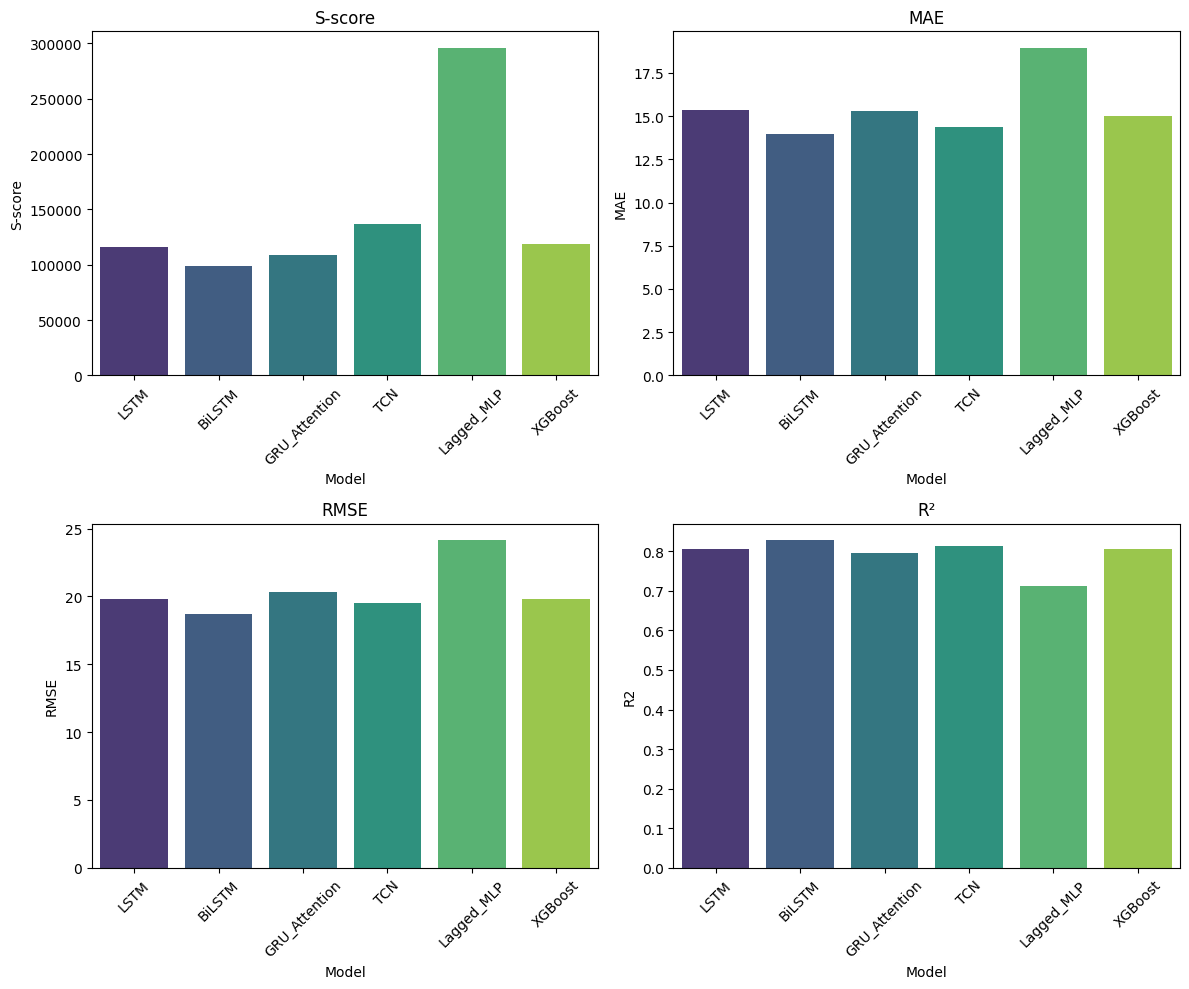

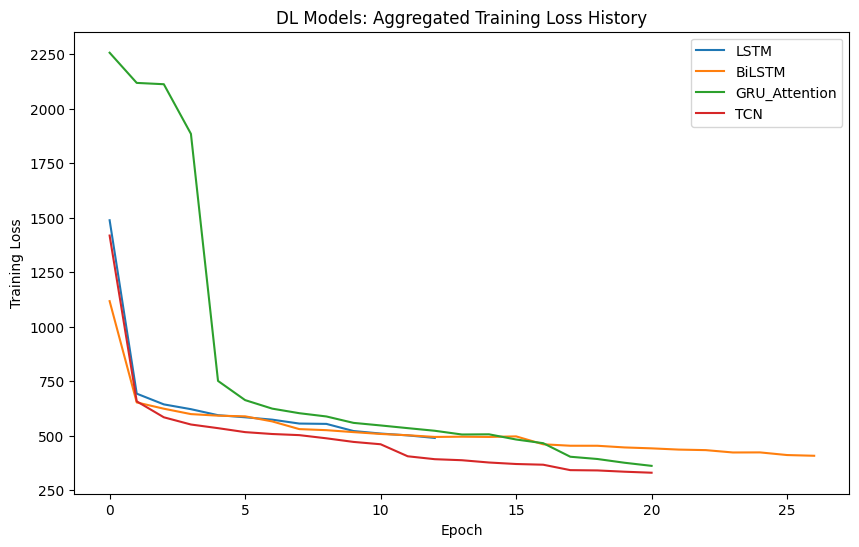

Final XGBoost model saved to adjusted_RUL/XGBoost_full_final.model.


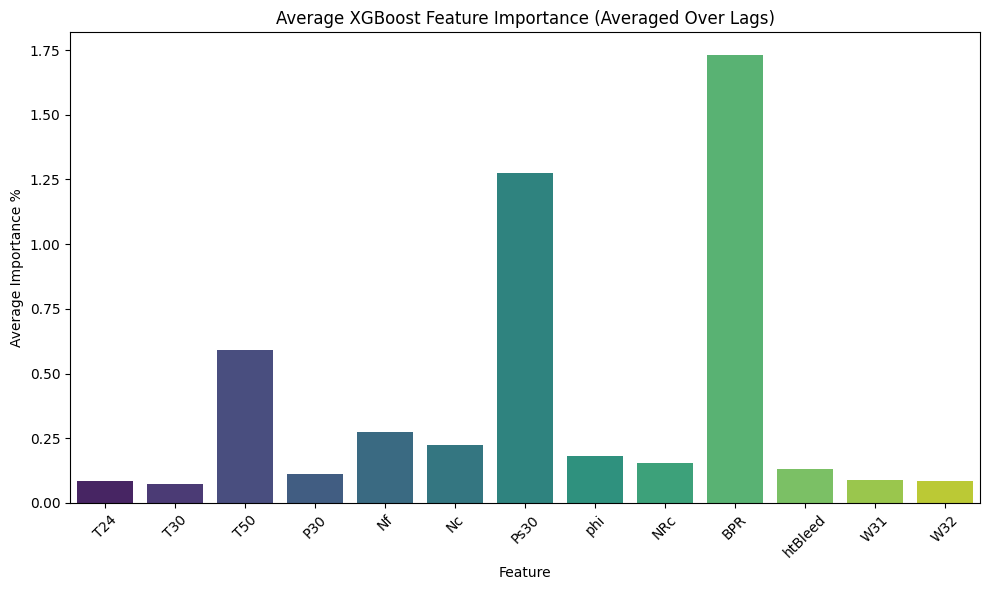


Running experiment for original RUL...

Using provided data.
Preparing DL data...
DL data ready: (48559, 20, 13), (48559,)
Preparing ML data...
ML data ready: (48559, 260), (48559,)
Running fixed split experiment for DL models...


Evaluating LSTM (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1215/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2637.4146
Epoch 1: val_loss improved from inf to 1754.49963, saving model to LSTM_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 2635.9365 - val_loss: 1754.4996 - learning_rate: 5.0000e-04
Epoch 2/100
1215/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1212.2345
Epoch 2: val_loss improved from 1754.49963 to 1394.76062, saving model to LSTM_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 1211.4924 - val_loss: 1394.7606 - learning_rate: 5.0000e-04
Epoch 3/100
1216/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 689.2321
Epoch 3: val_loss improved from 1394.76062 to 882.36676, saving model to LSTM_bes

LSTM metrics: MSE: 342.1426, MAE: 14.0699, RMSE: 18.4971, R2: 0.8046, S-score: 89122.0219
LSTM saved in original_RUL/LSTM_final.h5

Evaluating BiLSTM (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1215/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1794.9547
Epoch 1: val_loss improved from inf to 521.64587, saving model to BiLSTM_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - loss: 1793.1063 - val_loss: 521.6459 - learning_rate: 5.0000e-04
Epoch 2/100
1215/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 626.8464
Epoch 2: val_loss did not improve from 521.64587
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 626.8163 - val_loss: 2654.3320 - learning_rate: 5.0000e-04
Epoch 3/100
1215/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 586.3193
Epoch 3: val_loss did not improve from 521.64587
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 586.3178 - val_loss: 5673.6836 - learning_rate: 5.0000e-04
Epoch 4/100
1216/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss

BiLSTM metrics: MSE: 352.1497, MAE: 14.0172, RMSE: 18.7657, R2: 0.7989, S-score: 120198.5441
BiLSTM saved in original_RUL/BiLSTM_final.h5

Evaluating GRU_Attention (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1214/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2628.7722
Epoch 1: val_loss improved from inf to 1759.68909, saving model to GRU_Attention_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 2626.7998 - val_loss: 1759.6891 - learning_rate: 5.0000e-04
Epoch 2/100
1216/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1846.0675
Epoch 2: val_loss improved from 1759.68909 to 1751.25000, saving model to GRU_Attention_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1846.0748 - val_loss: 1751.2500 - learning_rate: 5.0000e-04
Epoch 3/100
1216/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1841.5146
Epoch 3: val_loss did not improve from 1751.25000
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1841.5133 - val_loss: 1752.3353 - learning_rate: 5

GRU_Attention metrics: MSE: 453.2675, MAE: 15.9030, RMSE: 21.2901, R2: 0.7412, S-score: 200090.7825
GRU_Attention saved in original_RUL/GRU_Attention_final.h5

Evaluating TCN (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1921.5879
Epoch 1: val_loss improved from inf to 1826.68921, saving model to TCN_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 1921.1274 - val_loss: 1826.6892 - learning_rate: 5.0000e-04
Epoch 2/100
1216/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 671.9191
Epoch 2: val_loss improved from 1826.68921 to 564.07043, saving model to TCN_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 671.8376 - val_loss: 564.0704 - learning_rate: 5.0000e-04
Epoch 3/100
1207/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 567.8889
Epoch 3: val_loss did not improve from 564.07043
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 567.7729 - val_loss: 586.0700 - learning_rate: 5.0000e-04
Epoch 4

TCN metrics: MSE: 382.5531, MAE: 14.4394, RMSE: 19.5590, R2: 0.7815, S-score: 154943.5452
TCN saved in original_RUL/TCN_final.h5
Running fixed split experiment for ML models...


Evaluating Lagged_MLP (fixed split)...
Train units: 208, Test units: 52
Epoch 1/100
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2747.1577
Epoch 1: val_loss improved from inf to 1764.70239, saving model to Lagged_MLP_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2746.6741 - val_loss: 1764.7024 - learning_rate: 5.0000e-04
Epoch 2/100
1196/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1773.6339
Epoch 2: val_loss improved from 1764.70239 to 1198.70593, saving model to Lagged_MLP_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1771.3181 - val_loss: 1198.7059 - learning_rate: 5.0000e-04
Epoch 3/100
1185/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1146.3333
Epoch 3: val_loss improved from 1198.70593 to 783.65808, saving model to Lagged_MLP_best.keras
1217/1217 ━━━━━━━━━━━━━━━━━━

Lagged_MLP metrics: MSE: 565.7193, MAE: 19.1339, RMSE: 23.7849, R2: 0.6769, S-score: 198425.0177
Lagged_MLP saved in original_RUL/Lagged_MLP_final.h5

Evaluating XGBoost (fixed split)...
Train units: 208, Test units: 52
XGBoost metrics: MSE: 411.5171, MAE: 15.3968, RMSE: 20.2859, R2: 0.7650, S-score: 134451.6237
XGBoost saved in original_RUL/XGBoost_final.model
Experiment completed.

Best adjusted_RUL model: BiLSTM
Best original RUL model: BiLSTM


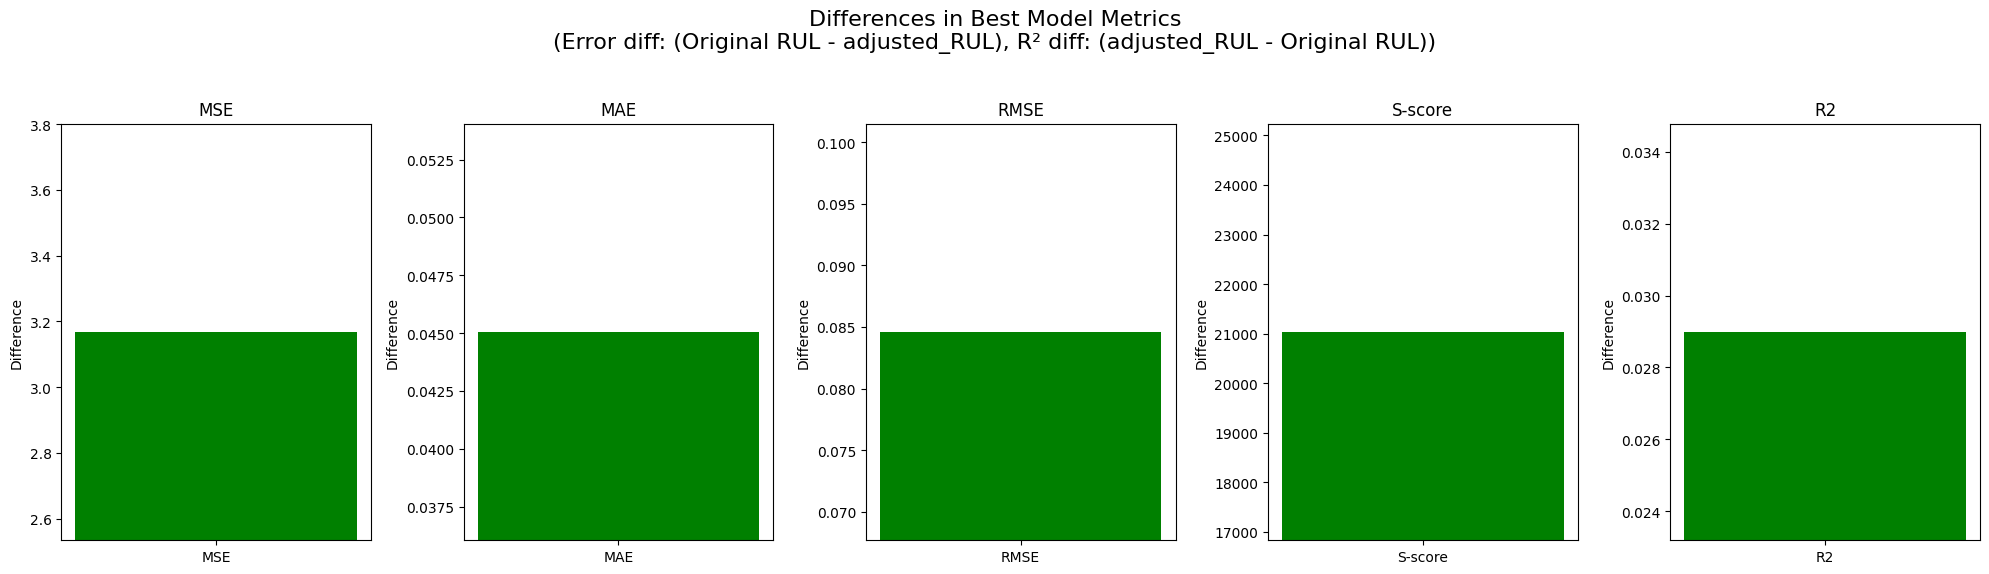

Adjusted_RUL Best Metrics: {'MSE': 348.98173267830725, 'MAE': 13.972125648392268, 'RMSE': 18.681052772215683, 'R2': 0.8278880932330376, 'S-score': 99164.79234837023}
Original RUL Best Metrics: {'MSE': 352.14967866516633, 'MAE': 14.017176940020626, 'RMSE': 18.765651565164646, 'R2': 0.798899547325642, 'S-score': 120198.54407235602}
Differences: {'MSE': 3.167945986859081, 'MAE': 0.04505129162835786, 'RMSE': 0.08459879294896311, 'S-score': 21033.751723985784, 'R2': 0.028988545907395635}


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# -------------------------
# Required imports for Keras/TensorFlow
# -------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GRU, Input, Layer, Conv1D, Add, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.backend as K

# -------------------------
# (Optional) imports for PyTorch Forecasting
# -------------------------
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, QuantileLoss
from pytorch_lightning import Trainer

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
# Import tqdm for progress bars
# -------------------------
from tqdm import tqdm

# -------------------------
# Import XGBoost
# -------------------------
from xgboost import XGBRegressor

# =============================================================================
# Define the custom S-score function
# =============================================================================
def compute_s_score(rul_true, rul_pred):
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))

# =============================================================================
# Define a standalone custom AttentionLayer
# =============================================================================
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight",
                                 shape=(input_shape[-1], 1),
                                 initializer="normal",
                                 trainable=True)
        self.b = self.add_weight(name="att_bias",
                                 shape=(input_shape[1], 1),
                                 initializer="zeros",
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# =============================================================================
# Define the ExperimentPipeline class (same as before)
# =============================================================================
class ExperimentPipeline:
    def __init__(self,
                 df=None,
                 features=None,
                 target_col="RUL",
                 group_col="unit_nr",
                 time_col="time_cycles",
                 n_samples=1000,
                 sequence_length=20,
                 epochs=100,
                 n_splits=5,
                 random_state=42):
        self.sequence_length = sequence_length
        self.epochs = epochs
        self.n_splits = n_splits
        self.random_state = random_state
        np.random.seed(self.random_state)

        if features is None:
            self.features = ["T24", "T30", "T50", "P30", "Nf", "Nc", "Ps30", "phi", "NRc", "BPR", "htBleed", "W31", "W32"]
        else:
            self.features = features
        self.target_col = target_col
        self.group_col = group_col
        self.time_col = time_col

        if df is None:
            print(f"No input data provided. Generating synthetic data with {n_samples} samples.")
            self.n_samples = n_samples
            n_units = 20
            unit_ids = np.random.choice(np.arange(1, n_units+1), size=self.n_samples)
            df_temp = pd.DataFrame({
                self.group_col: unit_ids,
                self.time_col: np.random.randint(1, 300, size=self.n_samples),
            })
            for feat in self.features:
                df_temp[feat] = np.random.rand(self.n_samples) * 100
            df_temp[self.target_col] = np.abs(np.random.normal(125, 20, self.n_samples))
            self.df = df_temp.sort_values(by=[self.group_col, self.time_col]).reset_index(drop=True)
        else:
            print("Using provided data.")
            self.df = df.copy()
            self.n_samples = len(self.df)
            if self.group_col in self.df.columns and self.time_col in self.df.columns:
                self.df.sort_values(by=[self.group_col, self.time_col], inplace=True)

        self.df[self.target_col] = self.df[self.target_col].astype(float)
        self.results_metrics = {}
        self.loss_histories = {}
        self.results_df = None
        self.groups = None

        self._prepare_data()
        self._prepare_ml_data()

    @staticmethod
    def compute_s_score(rul_true, rul_pred):
        return compute_s_score(rul_true, rul_pred)

    @staticmethod
    def create_sequences(data, target, sequence_length):
        X, y = [], []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i+sequence_length])
            y.append(target[i+sequence_length])
        return np.array(X), np.array(y)

    def _prepare_data(self):

        print("Preparing DL data...")
              # 1) Create and store the scaler
        self.scaler = MinMaxScaler()
        self.df[self.features] = self.scaler.fit_transform(self.df[self.features].values)
        X_list, y_list, group_list = [], [], []
        for unit, group_df in self.df.groupby(self.group_col):
            group_df = group_df.sort_values(by=self.time_col)
            unit_features = group_df[self.features].values
            unit_target = group_df[self.target_col].values
            if len(unit_features) > self.sequence_length:
                X_seq, y_seq = ExperimentPipeline.create_sequences(unit_features, unit_target, self.sequence_length)
                X_list.append(X_seq)
                y_list.append(y_seq)
                group_list.extend([unit]*len(y_seq))
        self.X_dl = np.concatenate(X_list, axis=0)
        self.y_dl = np.concatenate(y_list, axis=0)
        self.groups = np.array(group_list)
        print(f"DL data ready: {self.X_dl.shape}, {self.y_dl.shape}")

    def _prepare_ml_data(self):
        print("Preparing ML data...")
        X_list, y_list, group_list = [], [], []
        for unit, group_df in self.df.groupby(self.group_col):
            group_df = group_df.sort_values(by=self.time_col)
            unit_features = group_df[self.features].values
            unit_target = group_df[self.target_col].values
            if len(unit_features) >= self.sequence_length:
                for i in range(self.sequence_length, len(unit_features)):
                    X_list.append(unit_features[i-self.sequence_length:i].flatten())
                    y_list.append(unit_target[i])
                    group_list.append(unit)
        self.X_ml = np.array(X_list)
        self.y_ml = np.array(y_list)
        self.ml_groups = np.array(group_list)
        print(f"ML data ready: {self.X_ml.shape}, {self.y_ml.shape}")

    # --- DL Model Definitions (same as earlier) ---
    def create_lstm_model(self, input_shape):
        model = Sequential([
            LSTM(300, activation='tanh', return_sequences=True, input_shape=input_shape),
            Dropout(0.5),
            BatchNormalization(),
            LSTM(250, activation='tanh', return_sequences=True),
            Dropout(0.5),
            BatchNormalization(),
            LSTM(200, activation='tanh'),
            Dropout(0.5),
            Dense(100, activation='relu'),
            Dropout(0.3),
            Dense(1)
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
        return model

    def create_bilstm_model(self, input_shape):
        model = Sequential([
            Bidirectional(LSTM(300, activation='tanh', return_sequences=True), input_shape=input_shape),
            Dropout(0.5),
            BatchNormalization(),
            Bidirectional(LSTM(250, activation='tanh', return_sequences=True)),
            Dropout(0.5),
            BatchNormalization(),
            Bidirectional(LSTM(200, activation='tanh')),
            Dropout(0.5),
            Dense(100, activation='relu'),
            Dropout(0.3),
            Dense(1)
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
        return model

    def create_gru_attention_model(self, input_shape):
        inp = Input(shape=input_shape)
        x = GRU(250, return_sequences=True, activation='tanh')(inp)
        x = Dropout(0.5)(x)
        x = GRU(200, return_sequences=True, activation='tanh')(x)
        x = AttentionLayer()(x)
        x = Dropout(0.5)(x)
        x = Dense(100, activation='relu')(x)
        x = Dropout(0.3)(x)
        out = Dense(1)(x)
        model = Model(inp, out)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
        return model

    @staticmethod
    def residual_block(x, filters, kernel_size, dilation_rate, dropout_rate):
        prev_x = x
        out = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate, activation='relu')(x)
        out = Dropout(dropout_rate)(out)
        out = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate, activation='relu')(out)
        out = Dropout(dropout_rate)(out)
        if prev_x.shape[-1] != filters:
            prev_x = Conv1D(filters, 1, padding='same')(prev_x)
        out = Add()([prev_x, out])
        out = Activation('relu')(out)
        return out

    def create_custom_tcn_model(self, input_shape, num_filters=150, kernel_size=3, dropout_rate=0.35, num_levels=6):
        inputs = Input(shape=input_shape)
        x = inputs
        for i in range(num_levels):
            dilation_rate = 2 ** i
            x = ExperimentPipeline.residual_block(x, num_filters, kernel_size, dilation_rate, dropout_rate)
        x = Flatten()(x)
        x = Dense(150, activation='relu')(x)
        x = Dropout(0.35)(x)
        outputs = Dense(1)(x)
        model = Model(inputs, outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
        return model

    # --- Lagged MLP ---
    def create_lagged_mlp_model(self, input_dim):
        model = Sequential([
            Dense(256, activation='relu', input_dim=input_dim),
            Dropout(0.3),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
        return model

    # --- Helper: folder based on target ---
    def get_target_folder(self):
        folder = "adjusted_RUL" if self.target_col.lower() == "adjusted_rul" else "original_RUL"
        os.makedirs(folder, exist_ok=True)
        return folder

    # --- Fixed Split Runner for DL Models ---
    def run_model_fixed(self, model_func, model_name):
        print(f"\nEvaluating {model_name} (fixed split)...")
        unique_units = self.df[self.group_col].unique()
        n_train_units = int(0.8 * len(unique_units))
        train_units = unique_units[:n_train_units]
        test_units = unique_units[n_train_units:]
        train_idx = np.where(np.isin(self.groups, train_units))[0]
        test_idx = np.where(np.isin(self.groups, test_units))[0]
        X_train, X_test = self.X_dl[train_idx], self.X_dl[test_idx]
        y_train, y_test = self.y_dl[train_idx], self.y_dl[test_idx]
        print(f"Train units: {len(train_units)}, Test units: {len(test_units)}")

        checkpoint = ModelCheckpoint(f"{model_name}_best.keras",
                                     save_best_only=True, monitor="val_loss", mode="min", verbose=1)
        early_stop = EarlyStopping(monitor="val_loss", patience=8, verbose=1, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=4, verbose=1, min_lr=0.00005)

        input_shape = (X_train.shape[1], X_train.shape[2])
        model = model_func(input_shape)
        history = model.fit(X_train, y_train, epochs=self.epochs, batch_size=32,
                            validation_data=(X_test, y_test),
                            callbacks=[checkpoint, early_stop, reduce_lr],
                            verbose=1)
        y_pred = model.predict(X_test).ravel()
        mse_val = mean_squared_error(y_test, y_pred)
        mae_val = np.mean(np.abs(y_test - y_pred))
        rmse_val = np.sqrt(mse_val)
        r2_val = r2_score(y_test, y_pred)
        s_val = self.compute_s_score(y_test, y_pred)
        print(f"{model_name} metrics: MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R2: {r2_val:.4f}, S-score: {s_val:.4f}")
        metrics = {"MSE": mse_val, "MAE": mae_val, "RMSE": rmse_val, "R2": r2_val, "S-score": s_val}
        folder = self.get_target_folder()
        final_path = os.path.join(folder, f"{model_name}_final.h5")
        model.save(final_path)
        print(f"{model_name} saved in {final_path}")
        return metrics, history.history["loss"], model

    # --- Fixed Split Runner for Lagged MLP ---
    def run_lagged_mlp_fixed(self):
        print("\nEvaluating Lagged_MLP (fixed split)...")
        unique_units = np.unique(self.ml_groups)
        n_train_units = int(0.8 * len(unique_units))
        train_units = unique_units[:n_train_units]
        test_units = unique_units[n_train_units:]
        train_idx = np.where(np.isin(self.ml_groups, train_units))[0]
        test_idx = np.where(np.isin(self.ml_groups, test_units))[0]
        X_train, X_test = self.X_ml[train_idx], self.X_ml[test_idx]
        y_train, y_test = self.y_ml[train_idx], self.y_ml[test_idx]
        print(f"Train units: {len(train_units)}, Test units: {len(test_units)}")

        checkpoint = ModelCheckpoint("Lagged_MLP_best.keras",
                                     save_best_only=True, monitor="val_loss", mode="min", verbose=1)
        early_stop = EarlyStopping(monitor="val_loss", patience=8, verbose=1, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=4, verbose=1, min_lr=0.00005)

        input_dim = X_train.shape[1]
        model = self.create_lagged_mlp_model(input_dim)
        history = model.fit(X_train, y_train, epochs=self.epochs, batch_size=32,
                            validation_data=(X_test, y_test),
                            callbacks=[checkpoint, early_stop, reduce_lr],
                            verbose=1)
        y_pred = model.predict(X_test).ravel()
        mse_val = mean_squared_error(y_test, y_pred)
        mae_val = np.mean(np.abs(y_test - y_pred))
        rmse_val = np.sqrt(mse_val)
        r2_val = r2_score(y_test, y_pred)
        s_val = self.compute_s_score(y_test, y_pred)
        print(f"Lagged_MLP metrics: MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R2: {r2_val:.4f}, S-score: {s_val:.4f}")
        metrics = {"MSE": mse_val, "MAE": mae_val, "RMSE": rmse_val, "R2": r2_val, "S-score": s_val}
        folder = self.get_target_folder()
        final_path = os.path.join(folder, "Lagged_MLP_final.h5")
        model.save(final_path)
        print(f"Lagged_MLP saved in {final_path}")
        return metrics, history.history["loss"], model

    # --- Fixed Split Runner for XGBoost ---
    def run_xgboost_fixed(self):
        print("\nEvaluating XGBoost (fixed split)...")
        unique_units = np.unique(self.ml_groups)
        n_train_units = int(0.8 * len(unique_units))
        train_units = unique_units[:n_train_units]
        test_units = unique_units[n_train_units:]
        train_idx = np.where(np.isin(self.ml_groups, train_units))[0]
        test_idx = np.where(np.isin(self.ml_groups, test_units))[0]
        X_train, X_test = self.X_ml[train_idx], self.X_ml[test_idx]
        y_train, y_test = self.y_ml[train_idx], self.y_ml[test_idx]
        print(f"Train units: {len(train_units)}, Test units: {len(test_units)}")
        model = XGBRegressor(objective='reg:squarederror', random_state=self.random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_val = mean_squared_error(y_test, y_pred)
        mae_val = np.mean(np.abs(y_test - y_pred))
        rmse_val = np.sqrt(mse_val)
        r2_val = r2_score(y_test, y_pred)
        s_val = self.compute_s_score(y_test, y_pred)
        print(f"XGBoost metrics: MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R2: {r2_val:.4f}, S-score: {s_val:.4f}")
        metrics = {"MSE": mse_val, "MAE": mae_val, "RMSE": rmse_val, "R2": r2_val, "S-score": s_val}
        folder = self.get_target_folder()
        final_path = os.path.join(folder, "XGBoost_final.model")
        model.save_model(final_path)
        print(f"XGBoost saved in {final_path}")
        return metrics, model

    # --- Convenience methods ---
    def run_lstm_fixed(self):
        return self.run_model_fixed(self.create_lstm_model, "LSTM")
    def run_bilstm_fixed(self):
        return self.run_model_fixed(self.create_bilstm_model, "BiLSTM")
    def run_gru_attention_fixed(self):
        return self.run_model_fixed(self.create_gru_attention_model, "GRU_Attention")
    def run_tcn_fixed(self):
        return self.run_model_fixed(self.create_custom_tcn_model, "TCN")
    def run_lagged_mlp_experiment(self, use_cv=True):
        metrics, _, model = self.run_lagged_mlp_fixed()
        self.lagged_mlp_model = model
        return metrics
    def run_xgboost_experiment(self, use_cv=True):
        metrics, model = self.run_xgboost_fixed()
        self.xgb_model = model
        return metrics

    def train_xgboost_final(self):
        model = XGBRegressor(objective='reg:squarederror', random_state=self.random_state)
        model.fit(self.X_ml, self.y_ml)
        self.xgb_model = model
        folder = self.get_target_folder()
        final_path = os.path.join(folder, "XGBoost_full_final.model")
        model.save_model(final_path)
        print(f"Final XGBoost model saved to {final_path}.")
        return model

    def plot_xgboost_feature_importance(self):
        if not hasattr(self, "xgb_model"):
            print("No XGBoost model available. Please run train_xgboost_final() first.")
            return
        importances = self.xgb_model.feature_importances_
        try:
            reshaped = importances.reshape(self.sequence_length, len(self.features))
        except Exception as e:
            print("Error reshaping importances:", e)
            return
        avg_importance = np.mean(reshaped, axis=0)
        plt.figure(figsize=(10,6))
        sns.barplot(x=self.features, y=avg_importance*100, palette="viridis")
        plt.title("Average XGBoost Feature Importance (Averaged Over Lags)")
        plt.xlabel("Feature")
        plt.ylabel("Average Importance %")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_experiment(self):
        print("Running fixed split experiment for DL models...\n")
        lstm_metrics, lstm_loss, _ = self.run_lstm_fixed()
        bilstm_metrics, bilstm_loss, _ = self.run_bilstm_fixed()
        gru_metrics, gru_loss, _ = self.run_gru_attention_fixed()
        tcn_metrics, tcn_loss, _ = self.run_tcn_fixed()
        self.results_metrics["LSTM"] = lstm_metrics
        self.results_metrics["BiLSTM"] = bilstm_metrics
        self.results_metrics["GRU_Attention"] = gru_metrics
        self.results_metrics["TCN"] = tcn_metrics
        self.loss_histories["LSTM"] = lstm_loss
        self.loss_histories["BiLSTM"] = bilstm_loss
        self.loss_histories["GRU_Attention"] = gru_loss
        self.loss_histories["TCN"] = tcn_loss

        print("Running fixed split experiment for ML models...\n")
        lagged_mlp_metrics, _, _ = self.run_lagged_mlp_fixed()
        xgb_metrics, _ = self.run_xgboost_fixed()
        self.results_metrics["Lagged_MLP"] = lagged_mlp_metrics
        self.results_metrics["XGBoost"] = xgb_metrics

        models_list, mse_list, mae_list, rmse_list, r2_list, s_list = [], [], [], [], [], []
        for model_name, metrics in self.results_metrics.items():
            models_list.append(model_name)
            mse_list.append(metrics["MSE"])
            mae_list.append(metrics["MAE"])
            rmse_list.append(metrics["RMSE"])
            r2_list.append(metrics["R2"])
            s_list.append(metrics["S-score"])
        self.results_df = pd.DataFrame({
            "Model": models_list,
            "MSE": mse_list,
            "MAE": mae_list,
            "RMSE": rmse_list,
            "R2": r2_list,
            "S-score": s_list
        })
        print("Experiment completed.\n")
        return self.results_df

    def plot_metrics(self):
        if self.results_df is None:
            print("No results to plot. Run run_experiment() first.")
            return
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        sns.barplot(x="Model", y="S-score", data=self.results_df, ax=axes[0,0], palette="viridis")
        axes[0,0].set_title("S-score")
        axes[0,0].tick_params(axis='x', rotation=45)
        sns.barplot(x="Model", y="MAE", data=self.results_df, ax=axes[0,1], palette="viridis")
        axes[0,1].set_title("MAE")
        axes[0,1].tick_params(axis='x', rotation=45)
        sns.barplot(x="Model", y="RMSE", data=self.results_df, ax=axes[1,0], palette="viridis")
        axes[1,0].set_title("RMSE")
        axes[1,0].tick_params(axis='x', rotation=45)
        sns.barplot(x="Model", y="R2", data=self.results_df, ax=axes[1,1], palette="viridis")
        axes[1,1].set_title("R²")
        axes[1,1].tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_loss_histories(self):
        plt.figure(figsize=(10,6))
        for model_name, loss_history in self.loss_histories.items():
            if loss_history is not None:
                plt.plot(loss_history, label=model_name)
        plt.xlabel("Epoch")
        plt.ylabel("Training Loss")
        plt.title("DL Models: Aggregated Training Loss History")
        plt.legend()
        plt.show()

# =============================================================================
# Integrated Comparison Function (using an existing adjusted_RUL pipeline)
def compare_differences_only(pipeline_adj, df, features, group_col, time_col, sequence_length, epochs):
    """
    Using an existing adjusted_RUL pipeline (pipeline_adj), runs an experiment for original RUL,
    selects the best models (by lowest MAE) for each target, computes the differences for each metric,
    and then plots only the differences—each on its own subplot with y-axis extended by 20%.
    Returns both pipelines and the differences dictionary.
    """
    if pipeline_adj.results_df is None:
        pipeline_adj.run_experiment()

    print("\nRunning experiment for original RUL...\n")
    pipeline_rul = ExperimentPipeline(df=df, features=features, target_col="RUL",
                                      group_col=group_col, time_col=time_col,
                                      sequence_length=sequence_length, epochs=epochs, n_splits=None)
    pipeline_rul.run_experiment()

    # Function to select the best model by lowest MAE.
    def select_best_model(metrics_dict):
        best_model = None
        best_mae = np.inf
        for model, metrics in metrics_dict.items():
            if metrics["MAE"] < best_mae:
                best_mae = metrics["MAE"]
                best_model = model
        return best_model, metrics_dict[best_model]

    best_model_adj, best_metrics_adj = select_best_model(pipeline_adj.results_metrics)
    best_model_rul, best_metrics_rul = select_best_model(pipeline_rul.results_metrics)

    print(f"Best adjusted_RUL model: {best_model_adj}")
    print(f"Best original RUL model: {best_model_rul}")

    # Compute differences (error metrics: original RUL - adjusted_RUL, R²: adjusted_RUL - original R²)
    diff_dict = {
        "MSE": best_metrics_rul["MSE"] - best_metrics_adj["MSE"],
        "MAE": best_metrics_rul["MAE"] - best_metrics_adj["MAE"],
        "RMSE": best_metrics_rul["RMSE"] - best_metrics_adj["RMSE"],
        "S-score": best_metrics_rul["S-score"] - best_metrics_adj["S-score"],
        "R2": best_metrics_adj["R2"] - best_metrics_rul["R2"]
    }

    # Create a row of subplots (one per metric).
    labels = list(diff_dict.keys())
    differences = list(diff_dict.values())
    num_metrics = len(labels)
    fig, axes = plt.subplots(1, num_metrics, figsize=(4*num_metrics, 6), sharey=False)
    if num_metrics == 1:
        axes = [axes]
    for ax, label, diff_val in zip(axes, labels, differences):
        color = "green" if diff_val > 0 else "red"
        ax.bar(label, diff_val, color=color)
        # Extend y-axis by 20% of the absolute value or a default margin.
        margin = 0.2 * abs(diff_val) if abs(diff_val) > 0 else 0.1
        ax.set_ylim(diff_val - margin, diff_val + margin)
        ax.set_title(label)
        ax.axhline(0, color="black", linewidth=0.8)
        ax.set_ylabel("Difference")
    fig.suptitle("Differences in Best Model Metrics\n(Error diff: (Original RUL - adjusted_RUL), R² diff: (adjusted_RUL - Original RUL))", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    print("Adjusted_RUL Best Metrics:", best_metrics_adj)
    print("Original RUL Best Metrics:", best_metrics_rul)
    print("Differences:", diff_dict)

    return pipeline_adj, pipeline_rul, diff_dict

# =============================================================================
# Example Usage
# =============================================================================
if __name__ == "__main__":
    # Replace df=None with your actual DataFrame.
    df = df  # Synthetic data will be generated.
    features = ["T24", "T30", "T50", "P30", "Nf", "Nc", "Ps30", "phi", "NRc", "BPR", "htBleed", "W31", "W32"]
    group_col = "unit_nr"
    time_col = "time_cycles"
    sequence_length = 20
    epochs = 100  # Increase for real training.

    # Assume you already ran the adjusted_RUL pipeline.
    pipeline_adj = ExperimentPipeline(df=df, features=features, target_col="adjusted_RUL",
                                      group_col=group_col, time_col=time_col,
                                      sequence_length=sequence_length, epochs=epochs, n_splits=None)
    pipeline_adj.run_experiment()
    pipeline_adj.plot_metrics()
    pipeline_adj.plot_loss_histories()
    pipeline_adj.train_xgboost_final()
    pipeline_adj.plot_xgboost_feature_importance()

    # Generate the integrated differences-only comparison plot and also return both pipelines.
    pipeline_adj, pipeline_rul, diff_metrics = compare_differences_only(
        pipeline_adj, df, features, group_col, time_col, sequence_length, epochs
    )